<a href="https://colab.research.google.com/github/JaehwanKim00/Tiatanic_prac/blob/main/DArt_B_titanic_escape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚢 TITANIC에서 살아남기

안녕하세요 DArt-B 여러분, 2024-2 정규학기 첫번째 과제는 titanic과 함께 시작하게 되었습니다.
각 팀마다 홀수 혹은 짝수 문항을 분배받아 다른 학회원 분과 함께 질문에 답을 해 나가게 되었습니다.

파이썬이 익숙하지 않거나 머신러닝 경험이 적은 분들을 위해 baseline 코드를 제공합니다.
본 코드가 가장 이상적이라고 말씀드릴 수 없습니다. 그러나 이 코드 자체로 결과물을 도출할 수 있으니, 코드 자체에 어려움을 겪기보다는 조금이라도 개인적으로 사고하고 판단하는 데에 힘을 쏟으시길 바라겠습니다.

본 코드는 코랩 작동을 기반으로 짜여진 코드입니다.

## connection to google account

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 코렙 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123597 files and direc

In [ ]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/drive/MyDrive/titanic/asset/'
args.train_csv = args.default_path+'train.csv' #위의 파일 경로에다가 추가 경로만 덧붙이는 거. 이런 것이 가능하다라는 것을 알기
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'result/submission.csv'
args.save_results = args.default_path+"result/model_results.json"

# 데이터 분석을 위한 변수들
args.random_state = 42
args.results = []

#easydict 라이브러리를 사용하여 간단한 설정 및 변수들을 정의하고 초기화하는 작업을 수행

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)
submission = pd.read_csv(args.submission_csv)

## 데이터 파악

- Surived:0=사망, 1=생존
- Pclass: 1=1등석, 2=2등석, 3=3등석
- gender:male=남성, female=여성
- Age: 나이
- SibSp: 타이타닉 호에 동승한 자매/배우자의 수
- Parch: 타이타닉 호에 동승한 부모/자식의 수
- Ticket: 티켓 번호
- Fare: 승객 요금
- Cabin: 방 호수
- Embarked: 탑승지; C=셰르부르, Q=퀴즈타운, S=사우샘프턴

In [ ]:
ori_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
ori_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(ori_train.shape) #행과 열 크기 확인
print(ori_test.shape)

(891, 12)
(418, 11)


In [ ]:
print(ori_train.columns) #Survived 존재
print(ori_test.columns) #Survived 없음

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
ori_train.info()
#info()를 통해 전체 row 수, 칼럼별 데이터타입, 데이터타입의 null 여부, 칼럼 타입 등을 확인할 수 있습니다.
#Age, Cabin, Embarked에 대해 null 값이 존재합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(ori_train.isnull().sum())
print('---------')
print(ori_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
import missingno as msno # 결측치 시각화 패키지

<Axes: >

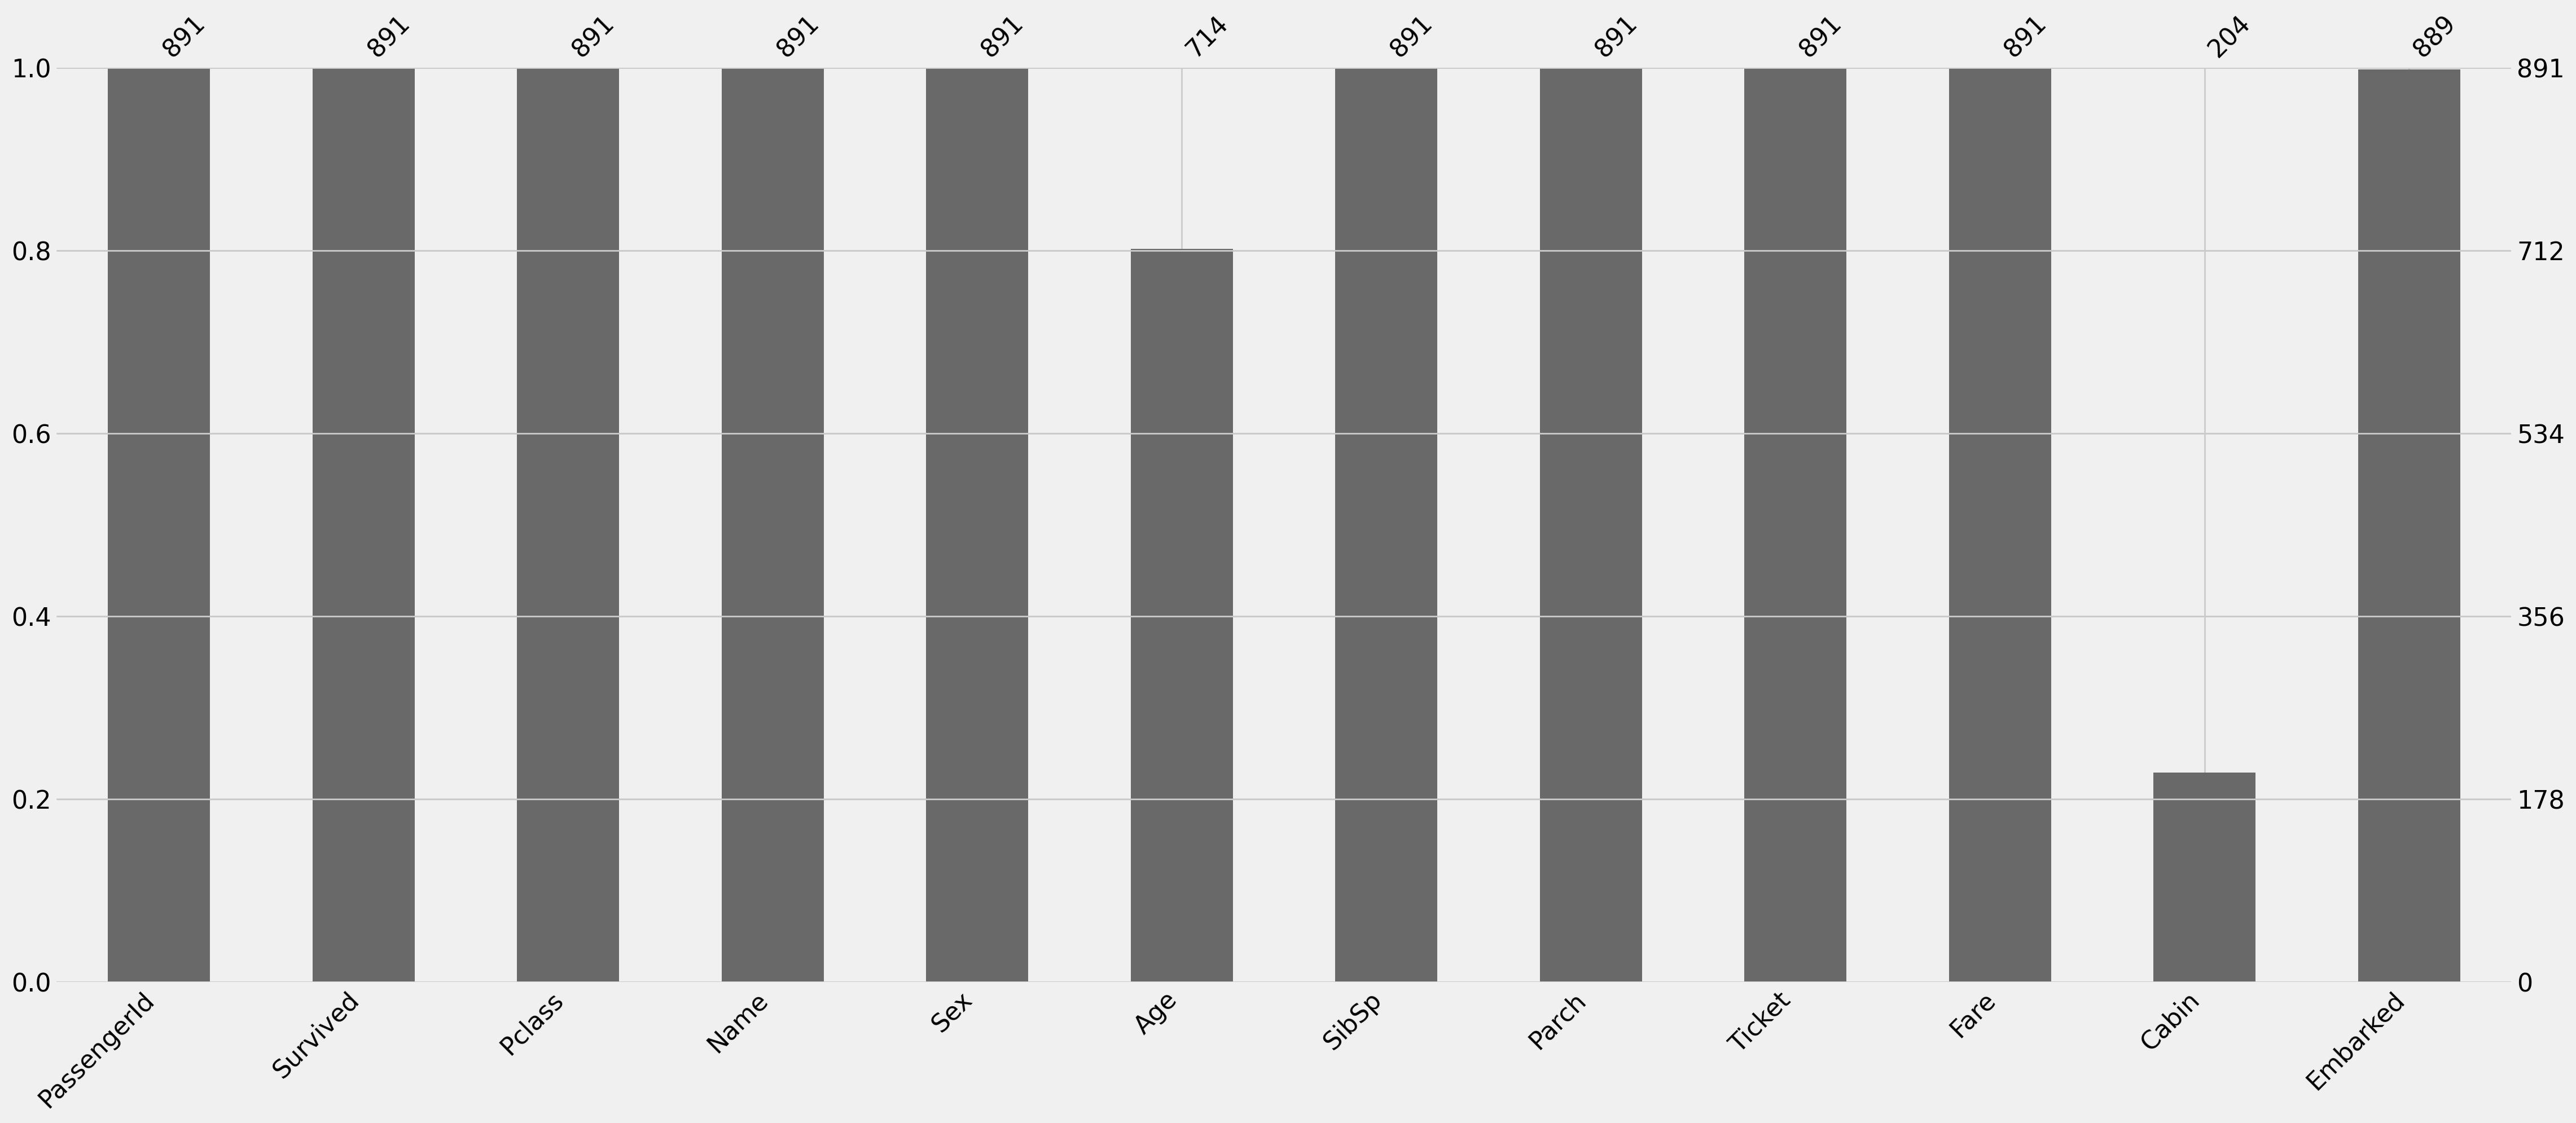

In [ ]:
msno.bar(ori_train)

<Axes: >

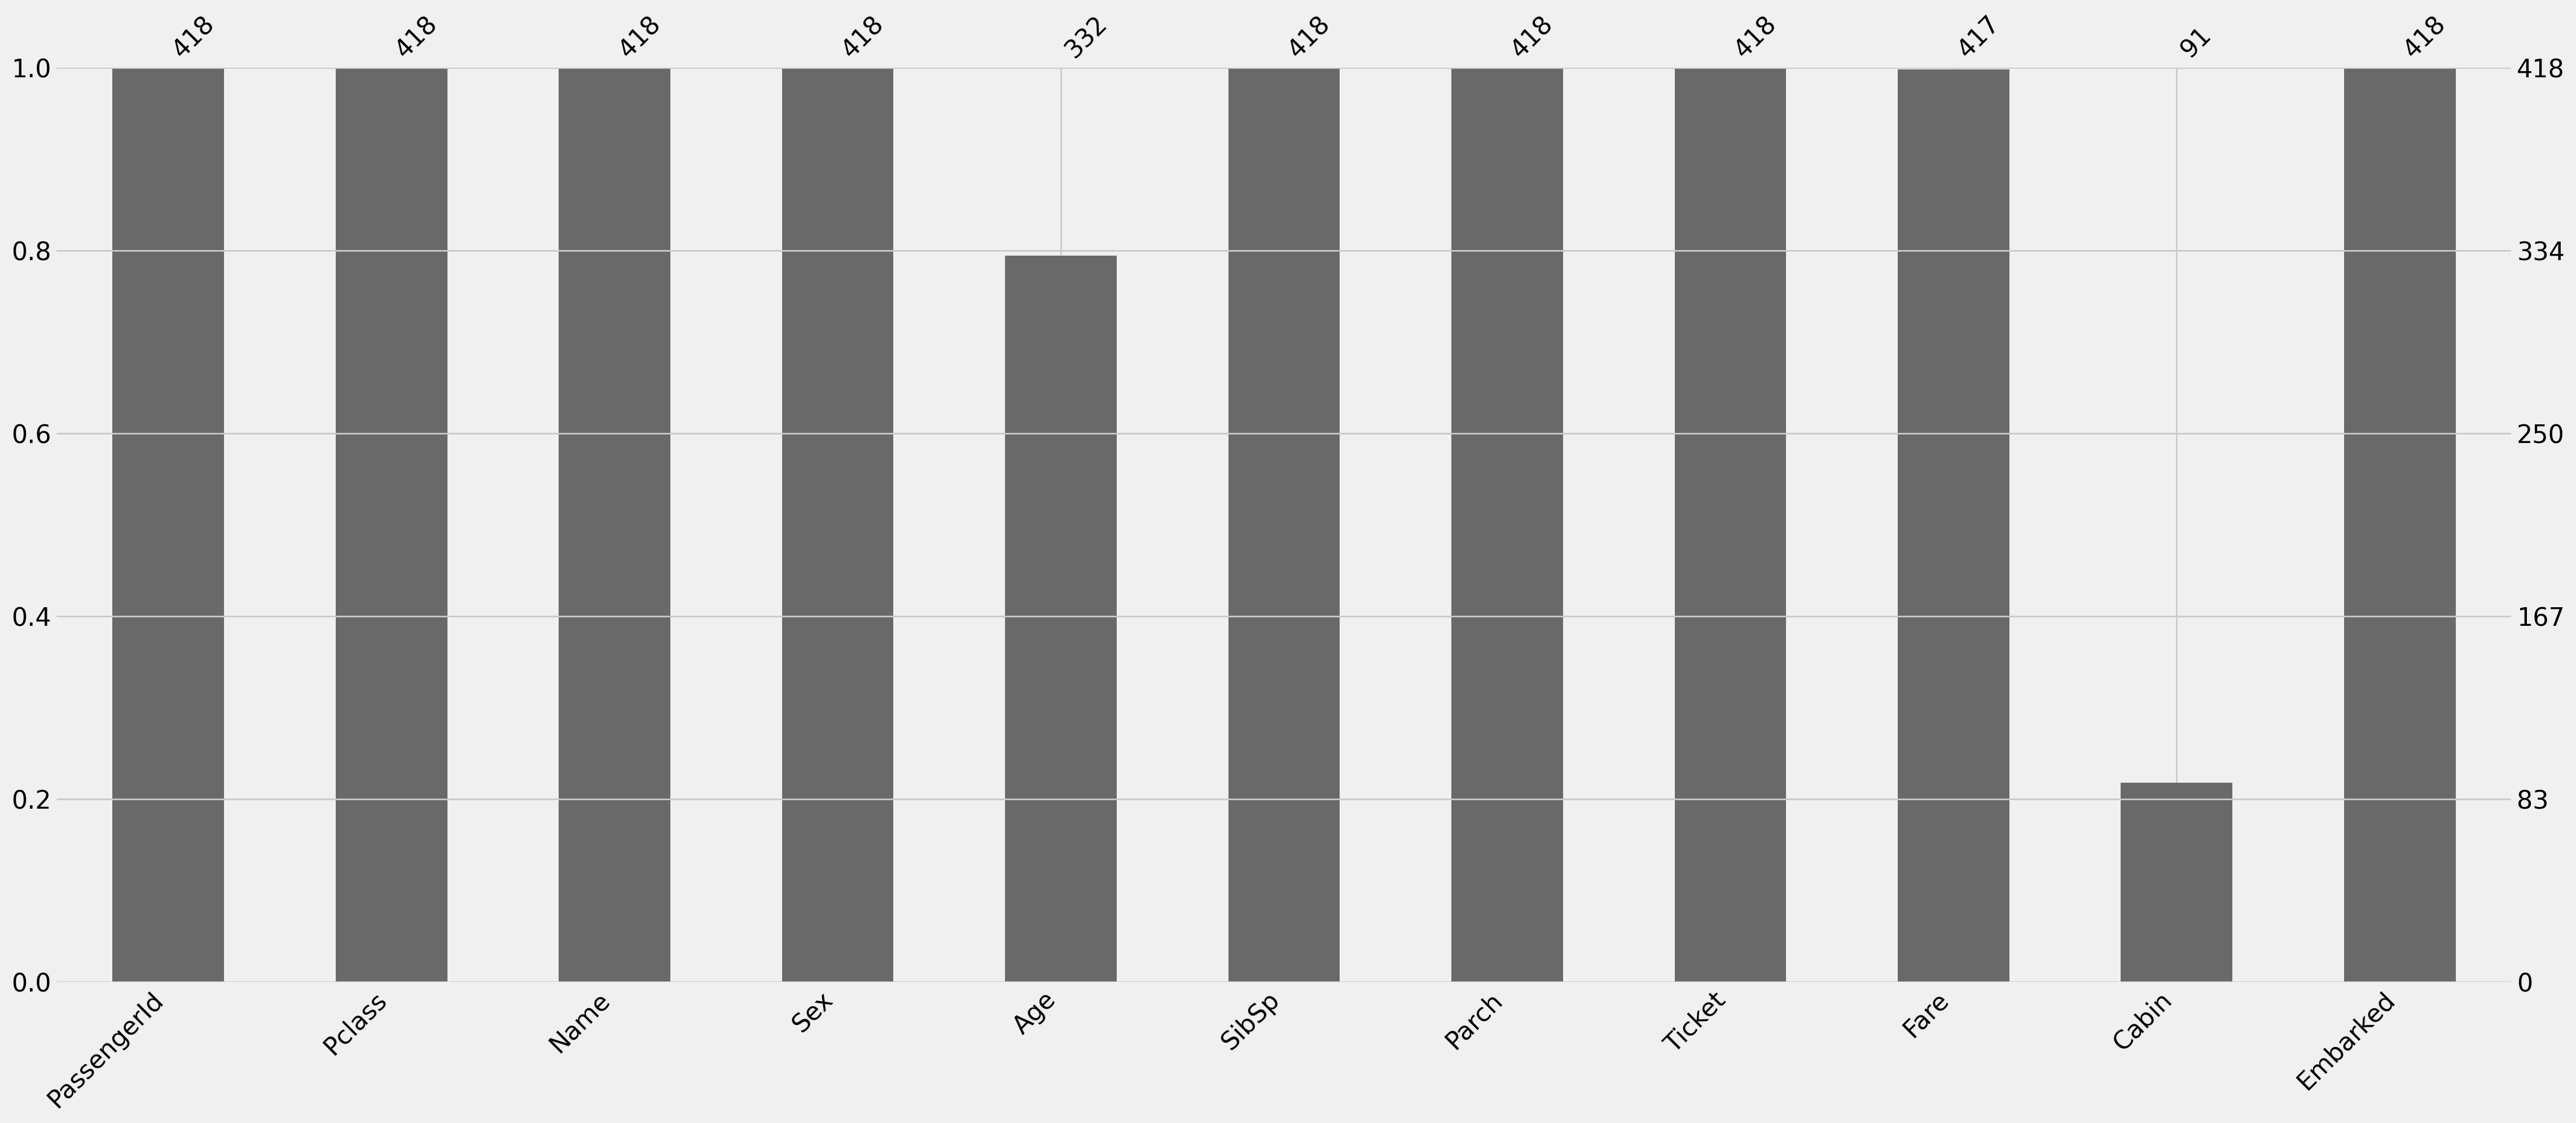

In [ ]:
msno.bar(ori_test)

In [ ]:
ori_train.describe()
#데이터의 분포도를 아는 것은 머신러닝 알고리즘의 성능을 향상시킵니다.
#회귀에서 결정값이 정규 분포를 이루지 않고 왜곡되는 경우, 이상치가 많은 경우 예측 성능이 저하됩니다.
#(describe 매서드로 정확한 분포도를 알 순 없지만) 개략적 수준의 분포도를 알 수 있어 유리합니다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
pclass_value = ori_train['Pclass'].value_counts()
pclass_value

,count
Pclass,
3,491
1,216
2,184


In [ ]:
sibsp_value = ori_train['SibSp'].value_counts()
sibsp_value

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
Parch_value = ori_train['Parch'].value_counts()
Parch_value

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [ ]:
Fare_value = ori_train['Fare'].value_counts()
Fare_value

,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
35.0000,1
28.5000,1
6.2375,1


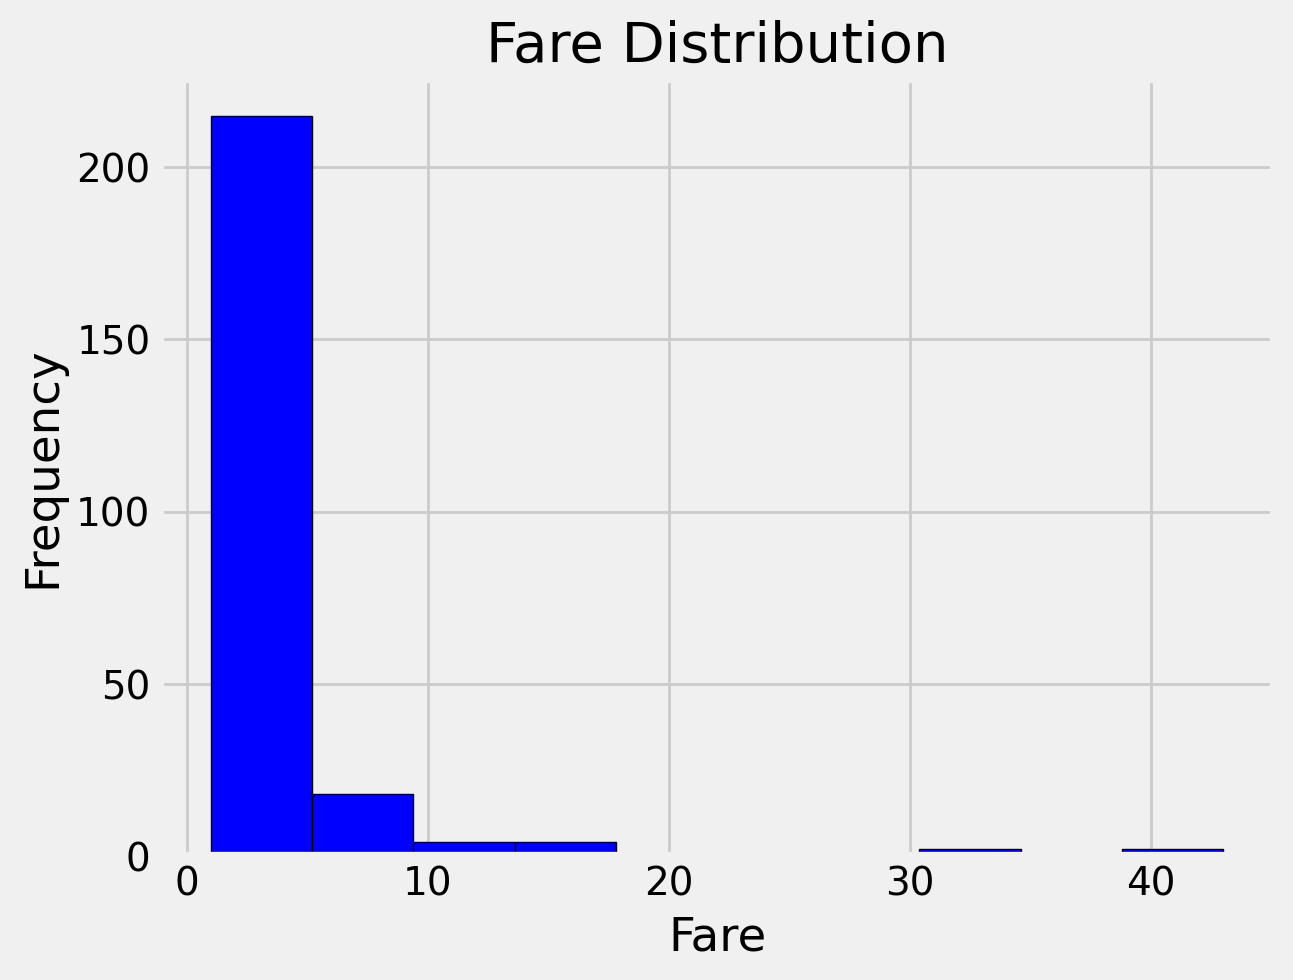

In [ ]:
plt.hist(Fare_value, bins=10, color='blue', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# EDA

전처리에 앞서, 데이터의 분포를 확인하면
다중공선성에 의문을 제기하거나, 결측치 대체 방법에 대한 힌트를 얻을 수 있습니다. 또한 가설 검정 전, 나의 가설이 검정할 가치가 있는지를 확인할 수도 있습니다.

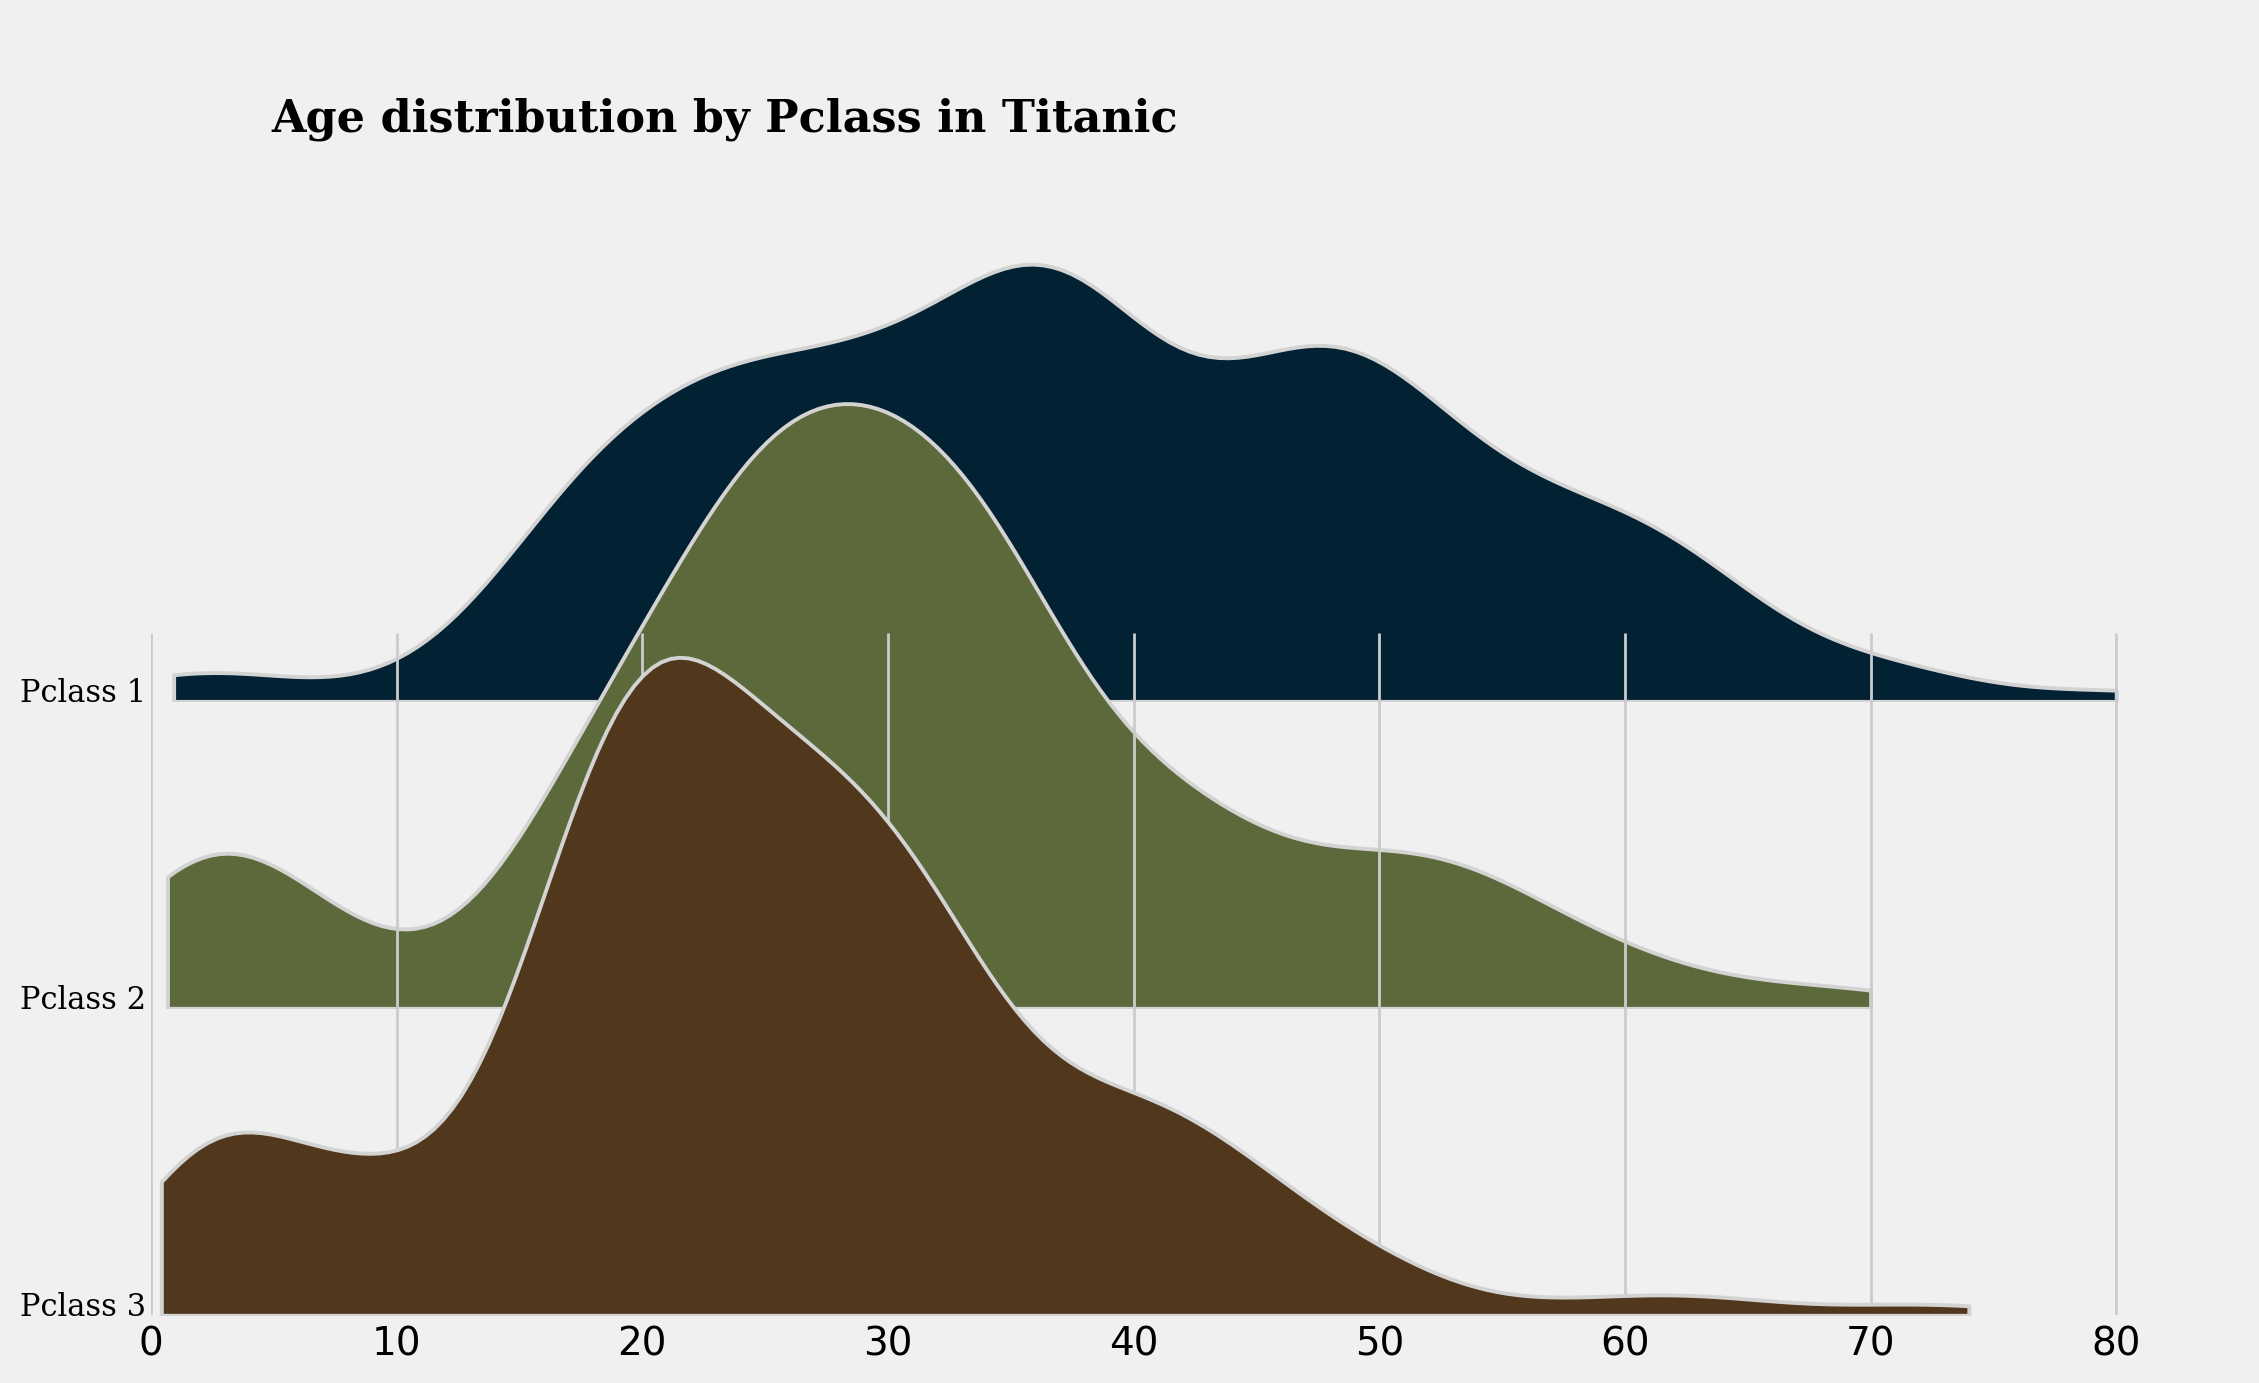

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(ori_train['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))

    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=ori_train[ori_train['Pclass']==cls],
                fill=True, ax=axes[idx], cut=0, bw_method=0.25,
                lw=1.4, edgecolor='lightgray',color=c, alpha=1)

    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)

    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')

    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)

    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")

fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

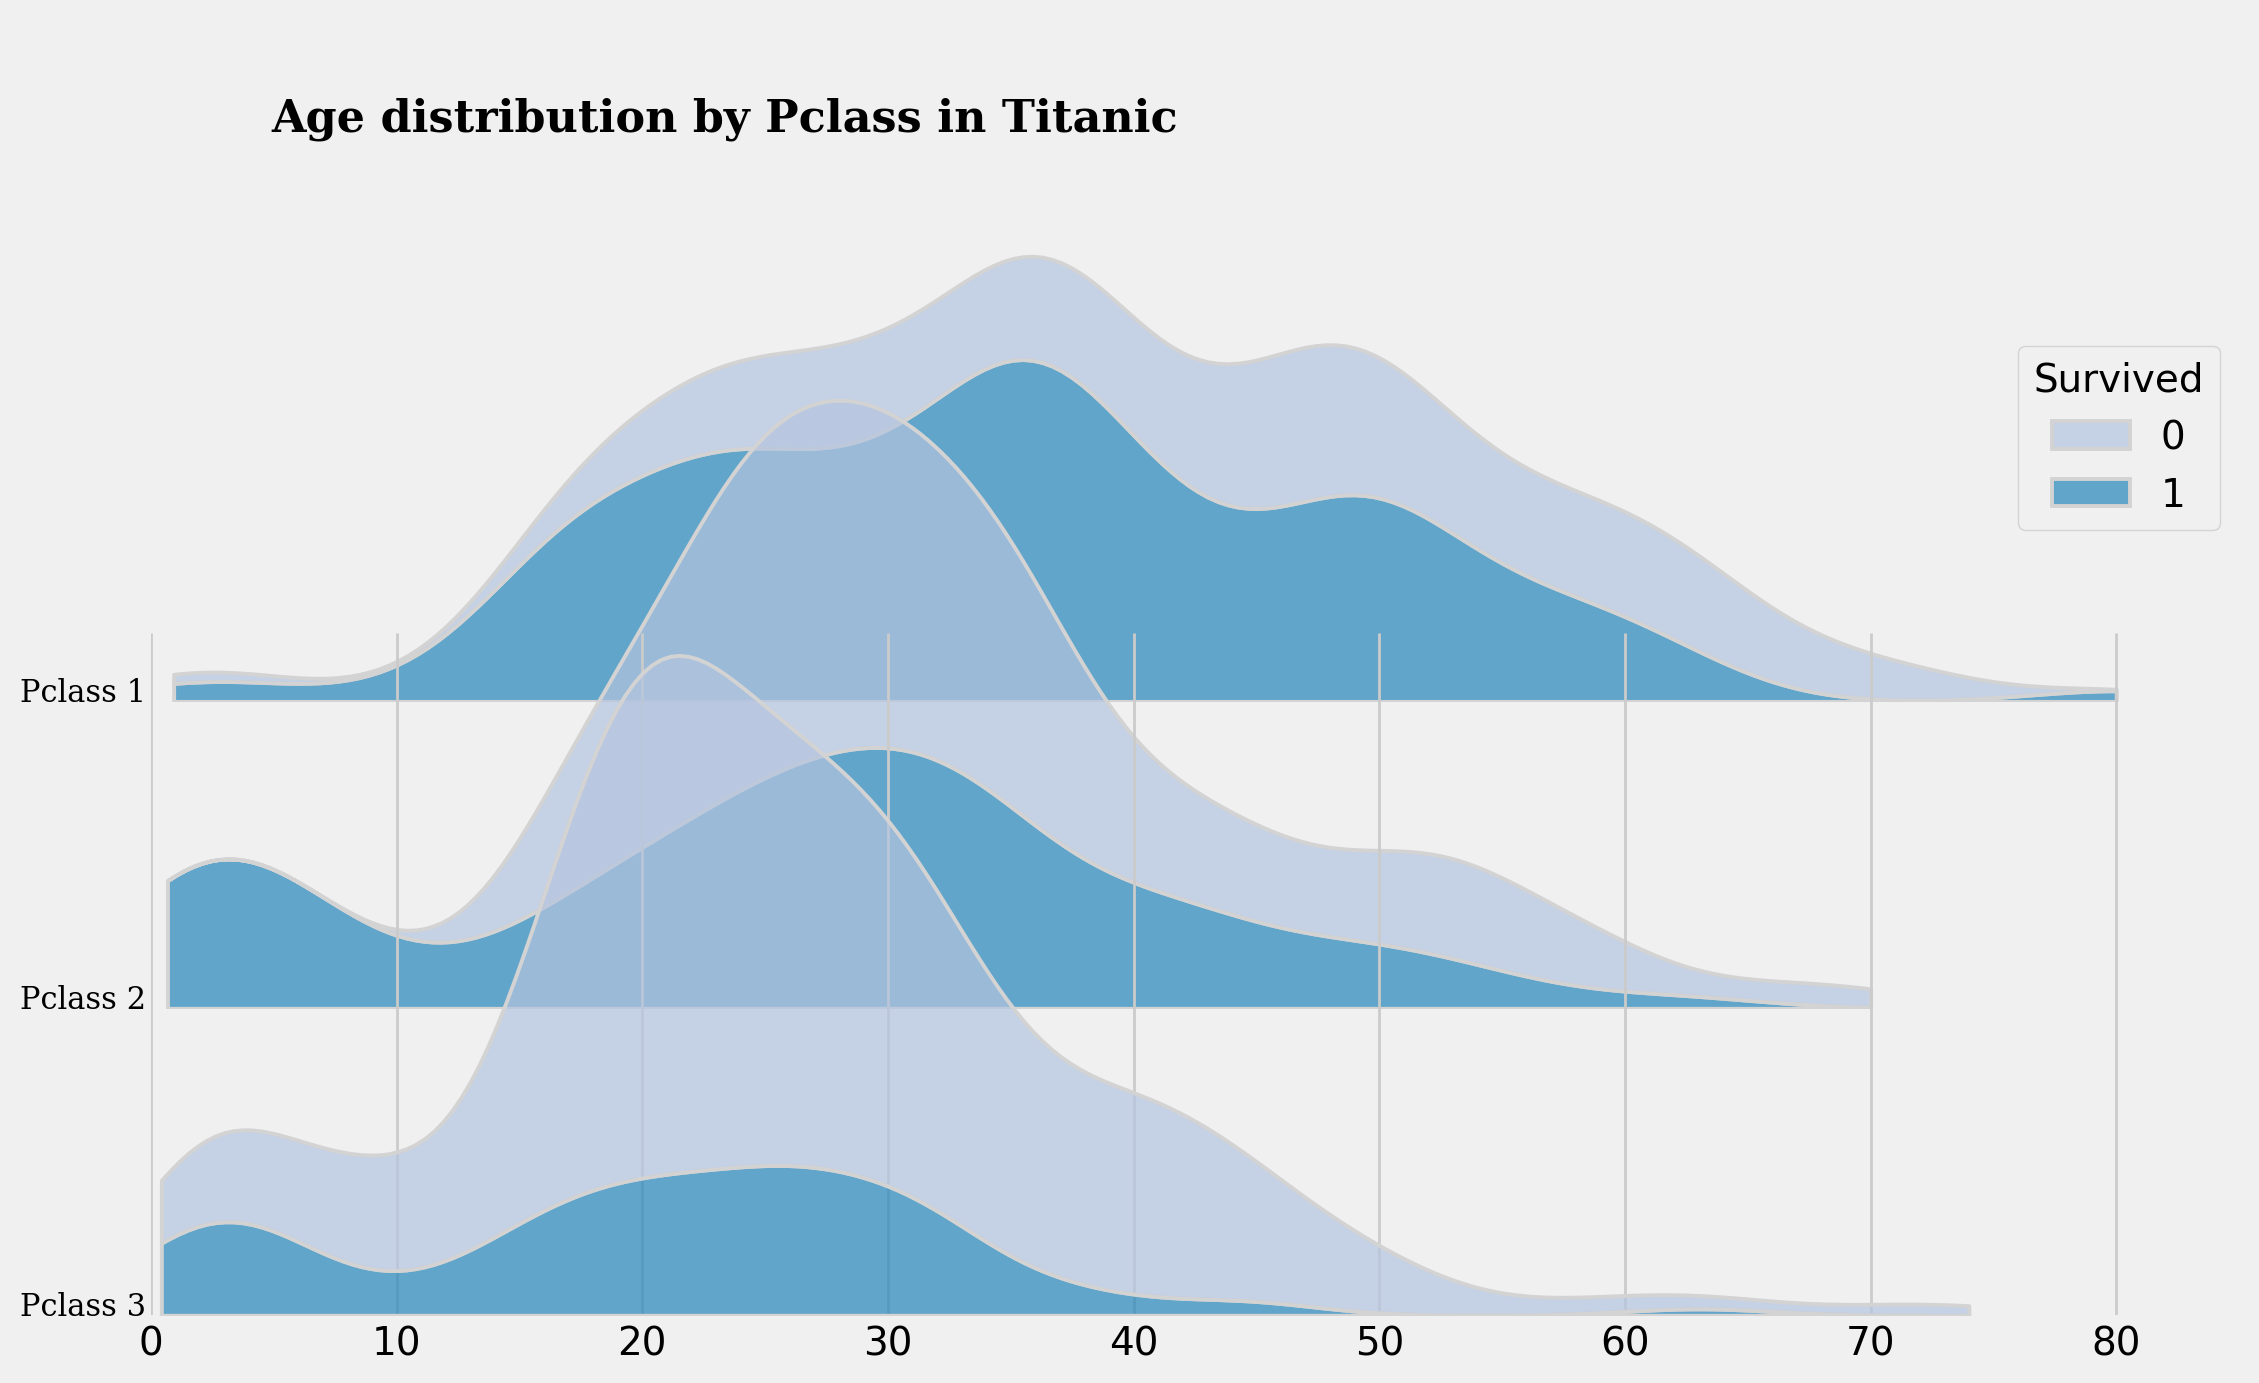

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(ori_train['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))

    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=ori_train[ori_train['Pclass']==cls],
                fill=True, ax=axes[idx], cut=0, bw_method=0.25,
                lw=1.4, edgecolor='lightgray', hue='Survived',
                multiple="stack", palette='PuBu', alpha=0.7
               )

    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)

    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')

    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)

    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    if idx != 1 : axes[idx].get_legend().remove()

fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)

plt.show()

PClass는 유의해보이므로, 검정해도 좋아보입니다. (클래스가 높아질수록 살아남을 확률이 높아 보입니다.)

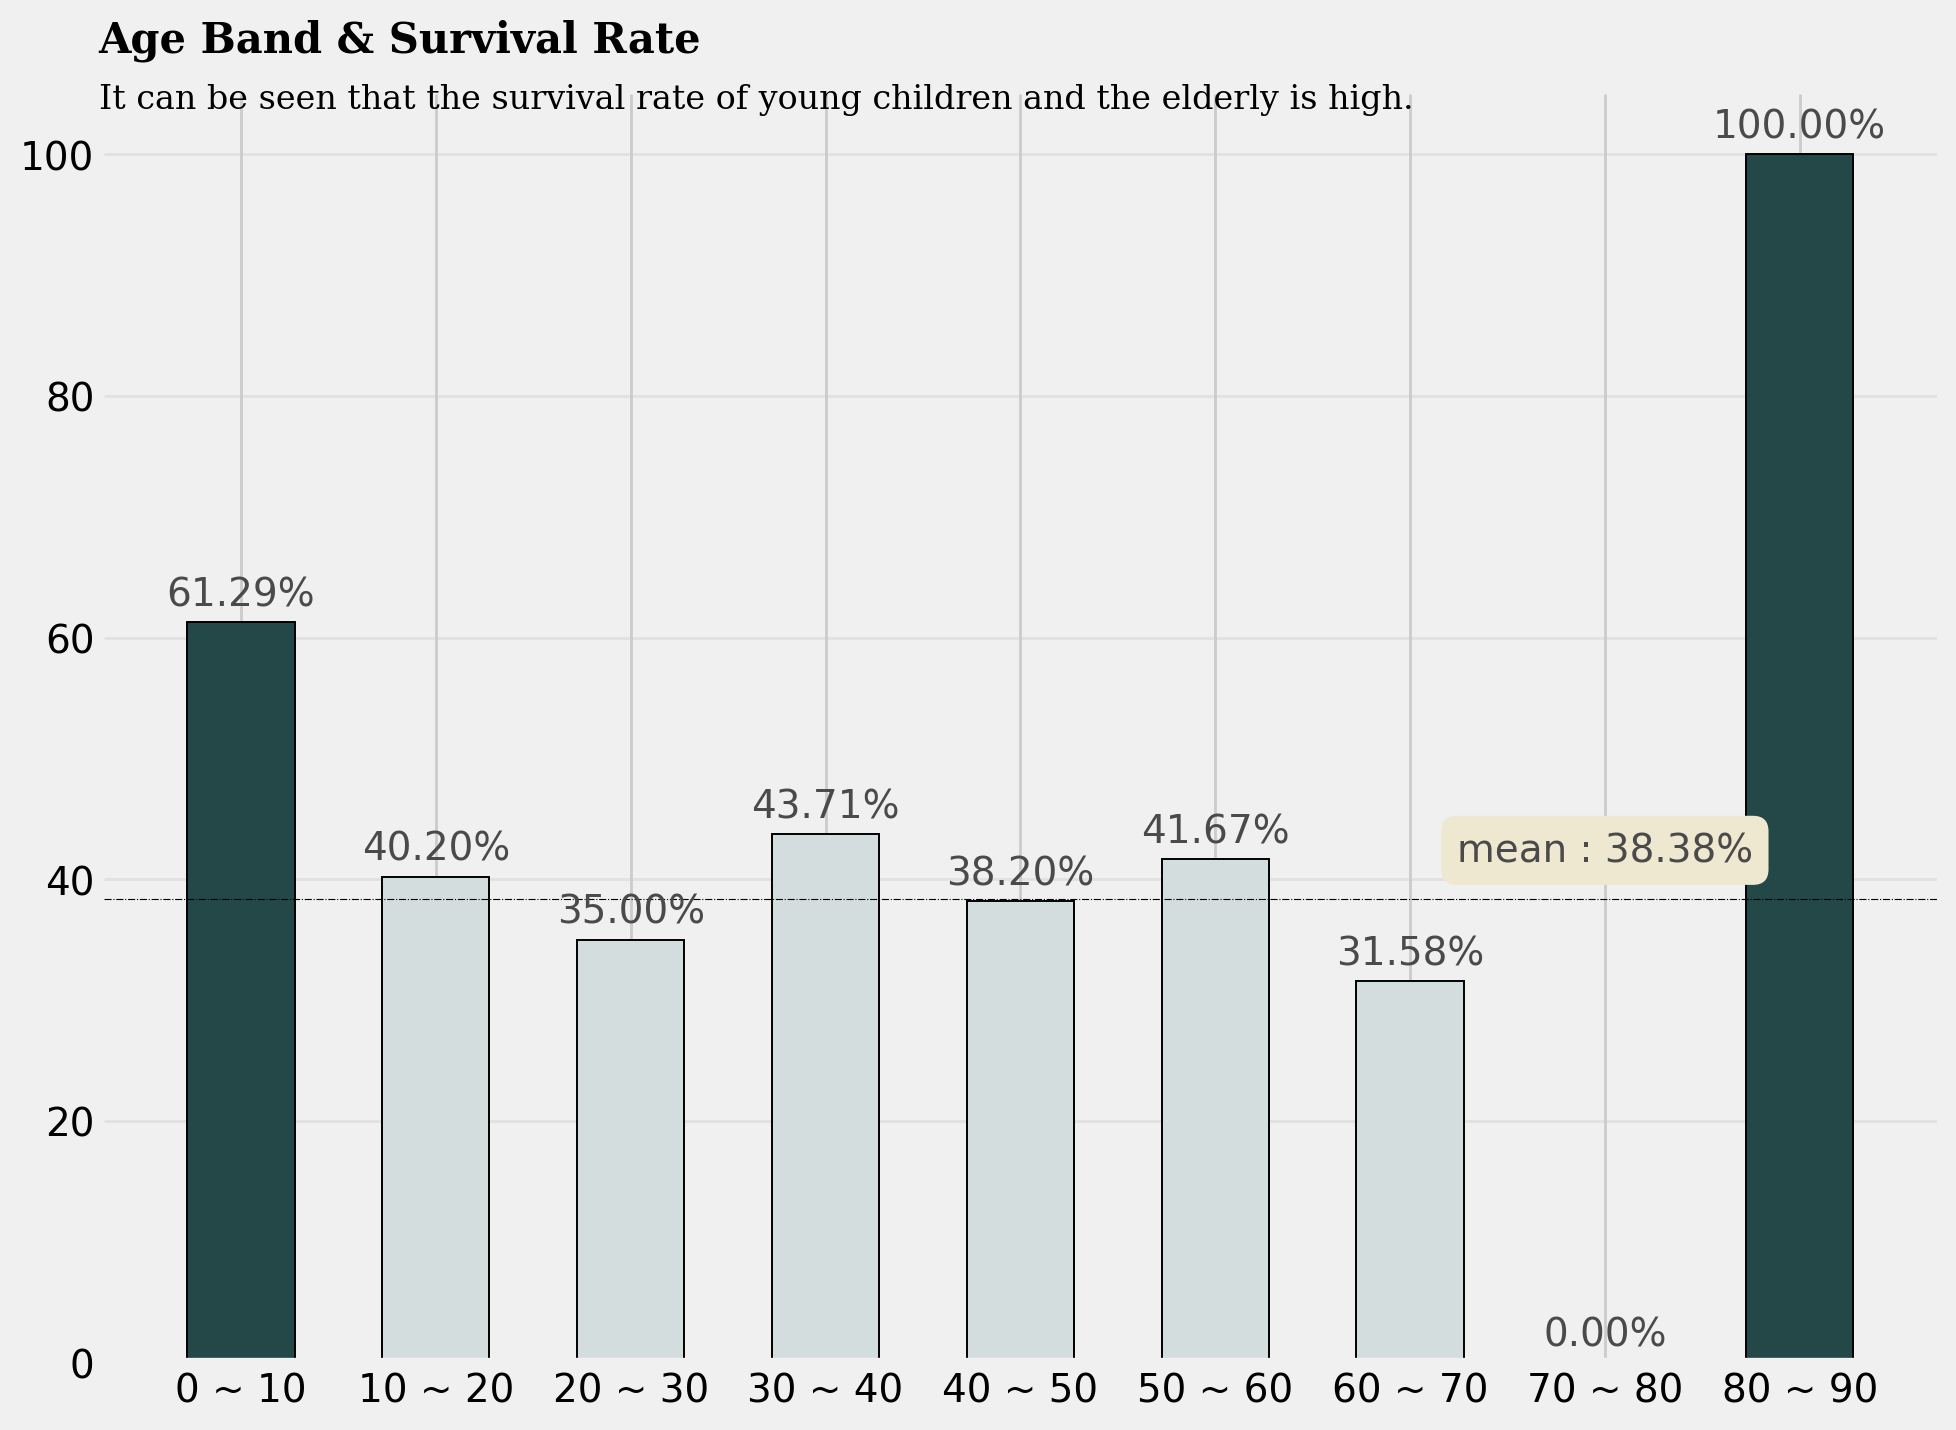

In [ ]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

ori_train['age_band'] = ori_train['Age'].apply(age_band)
titanic_age = ori_train[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' # color highlight

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'],
       color=color_map, width=0.55,
       edgecolor='black',
       linewidth=0.7)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%",
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light',
                   color='#4a4a4a')


# mean line + annotation
mean = ori_train['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%",
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))


# Title & Subtitle
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

나이 또한 유의해보이므로, 검정해도 좋아보입니다.

In [ ]:
survival_rate = ori_train.groupby(['Sex'])['Survived'].mean()
survival_rate

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']

male_pos = np.random.uniform(0, male_rate, len(ori_train[(ori_train['Sex']=='male') & (ori_train['Survived']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(ori_train[(ori_train['Sex']=='male') & (ori_train['Survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(ori_train[(ori_train['Sex']=='female') & (ori_train['Survived']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(ori_train[(ori_train['Sex']=='female') & (ori_train['Survived']==0)]))

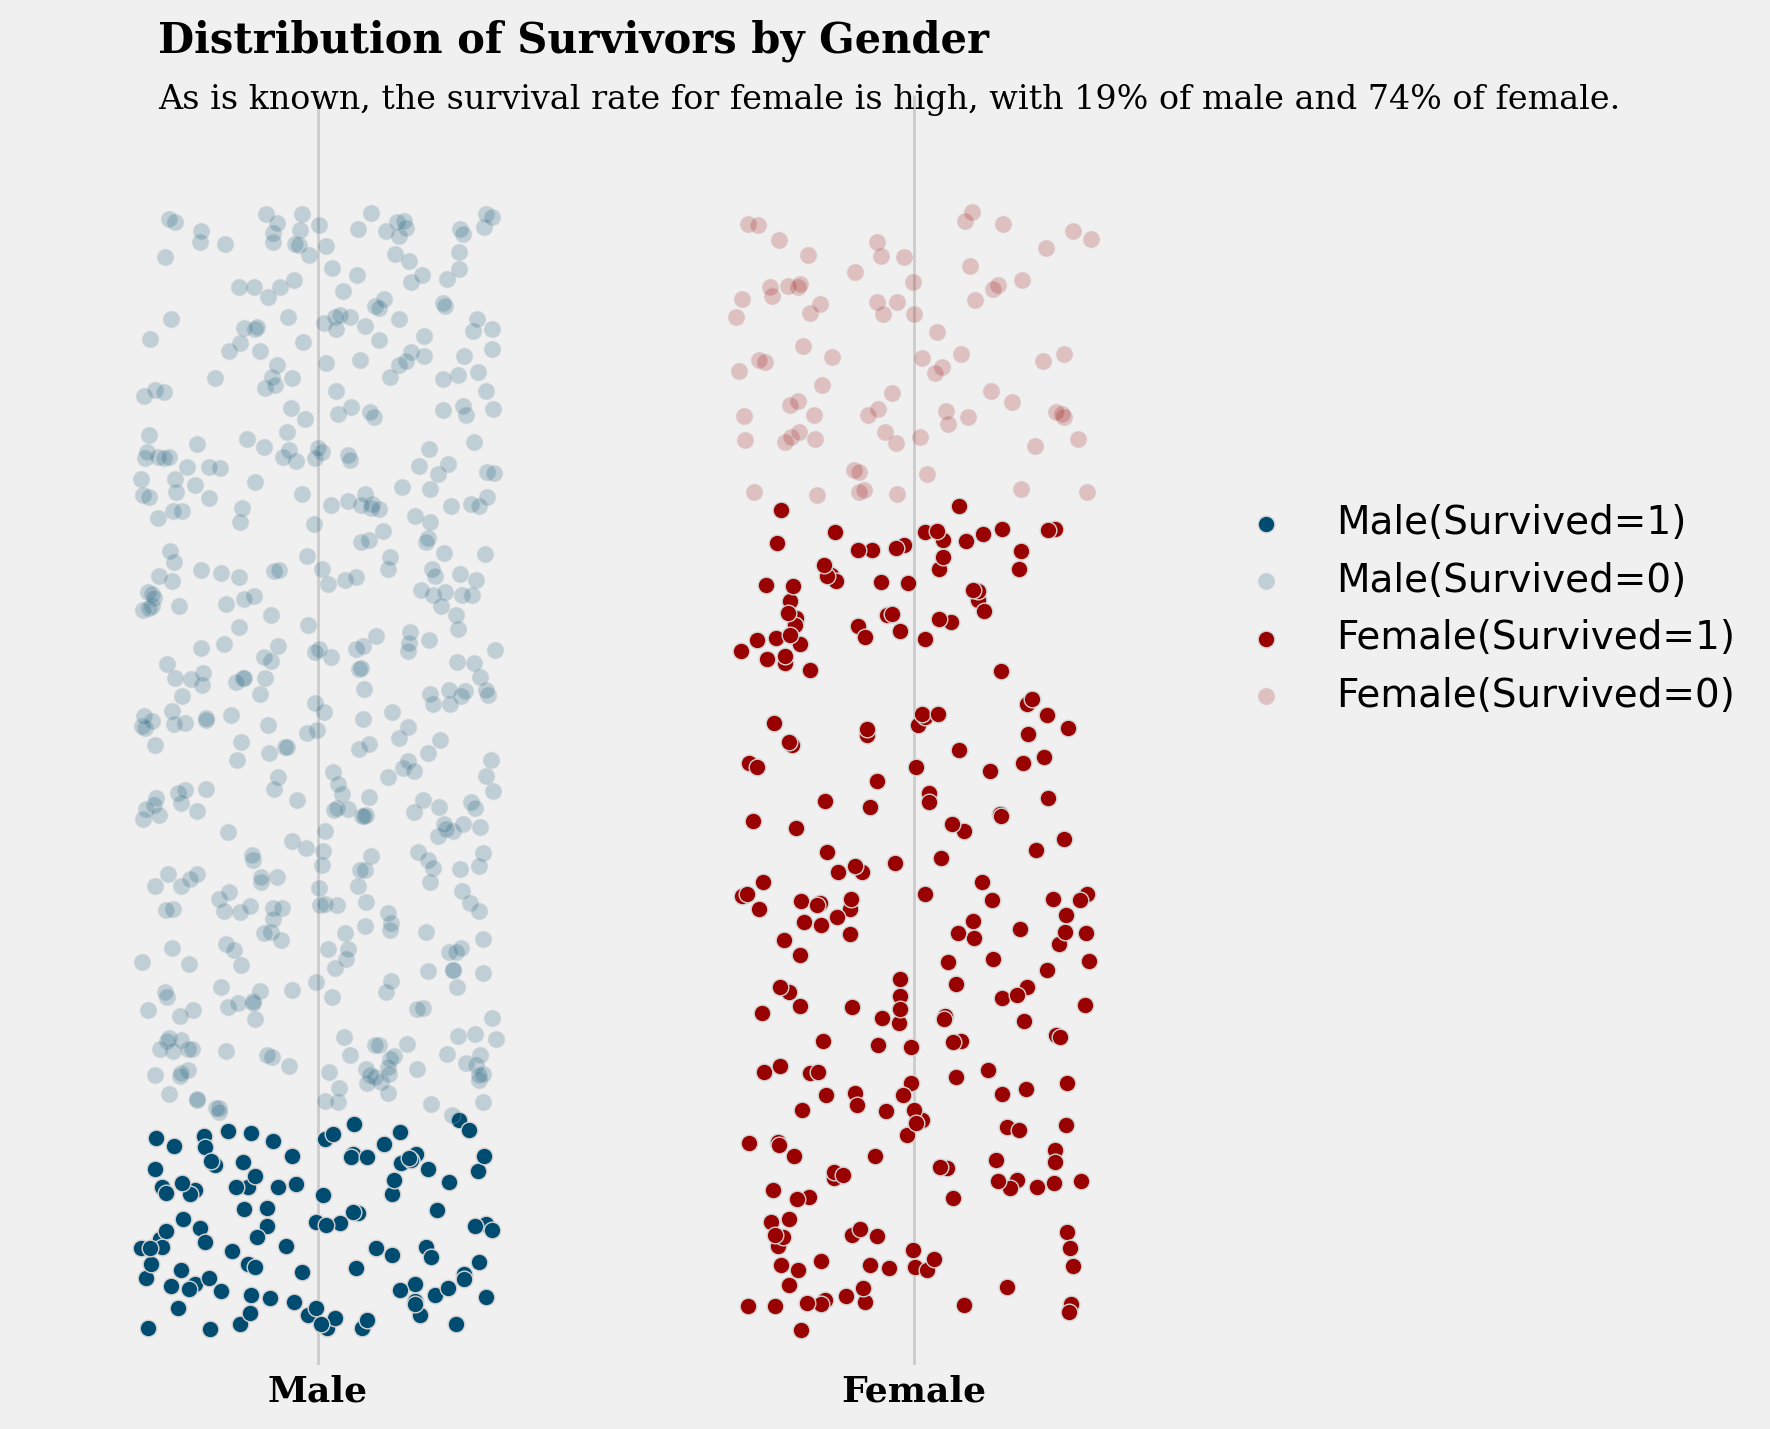

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(42)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

# Set Figure & Axes
ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.1, 1, 'Distribution of Survivors by Gender', fontweight='bold', fontfamily='serif', fontsize=15)
fig.text(0.1, 0.96, 'As is known, the survival rate for female is high, with 19% of male and 74% of female.', fontweight='light', fontfamily='serif', fontsize=12)

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()


성별은 유의해보이므로 검정해도 좋아보입니다.

SibSp, Parch, Fare을 포함한 값들에 대해서도 EDA를 진행하고, 가설 검정의 가치가 있는지를 파악하면 좋습니다.
통계적 검증 방법론을 사용하여 숫자로만 보는 것이 항상 옳지는 않습니다.

In [ ]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)

# 통계적 검증에 대하여

가장 많이 사용하시는 corr() 메소드, 즉 피어슨 상관계수입니다.
그러나 피어슨 상관계수가 모든 데이터에 효과적이진 않습니다.

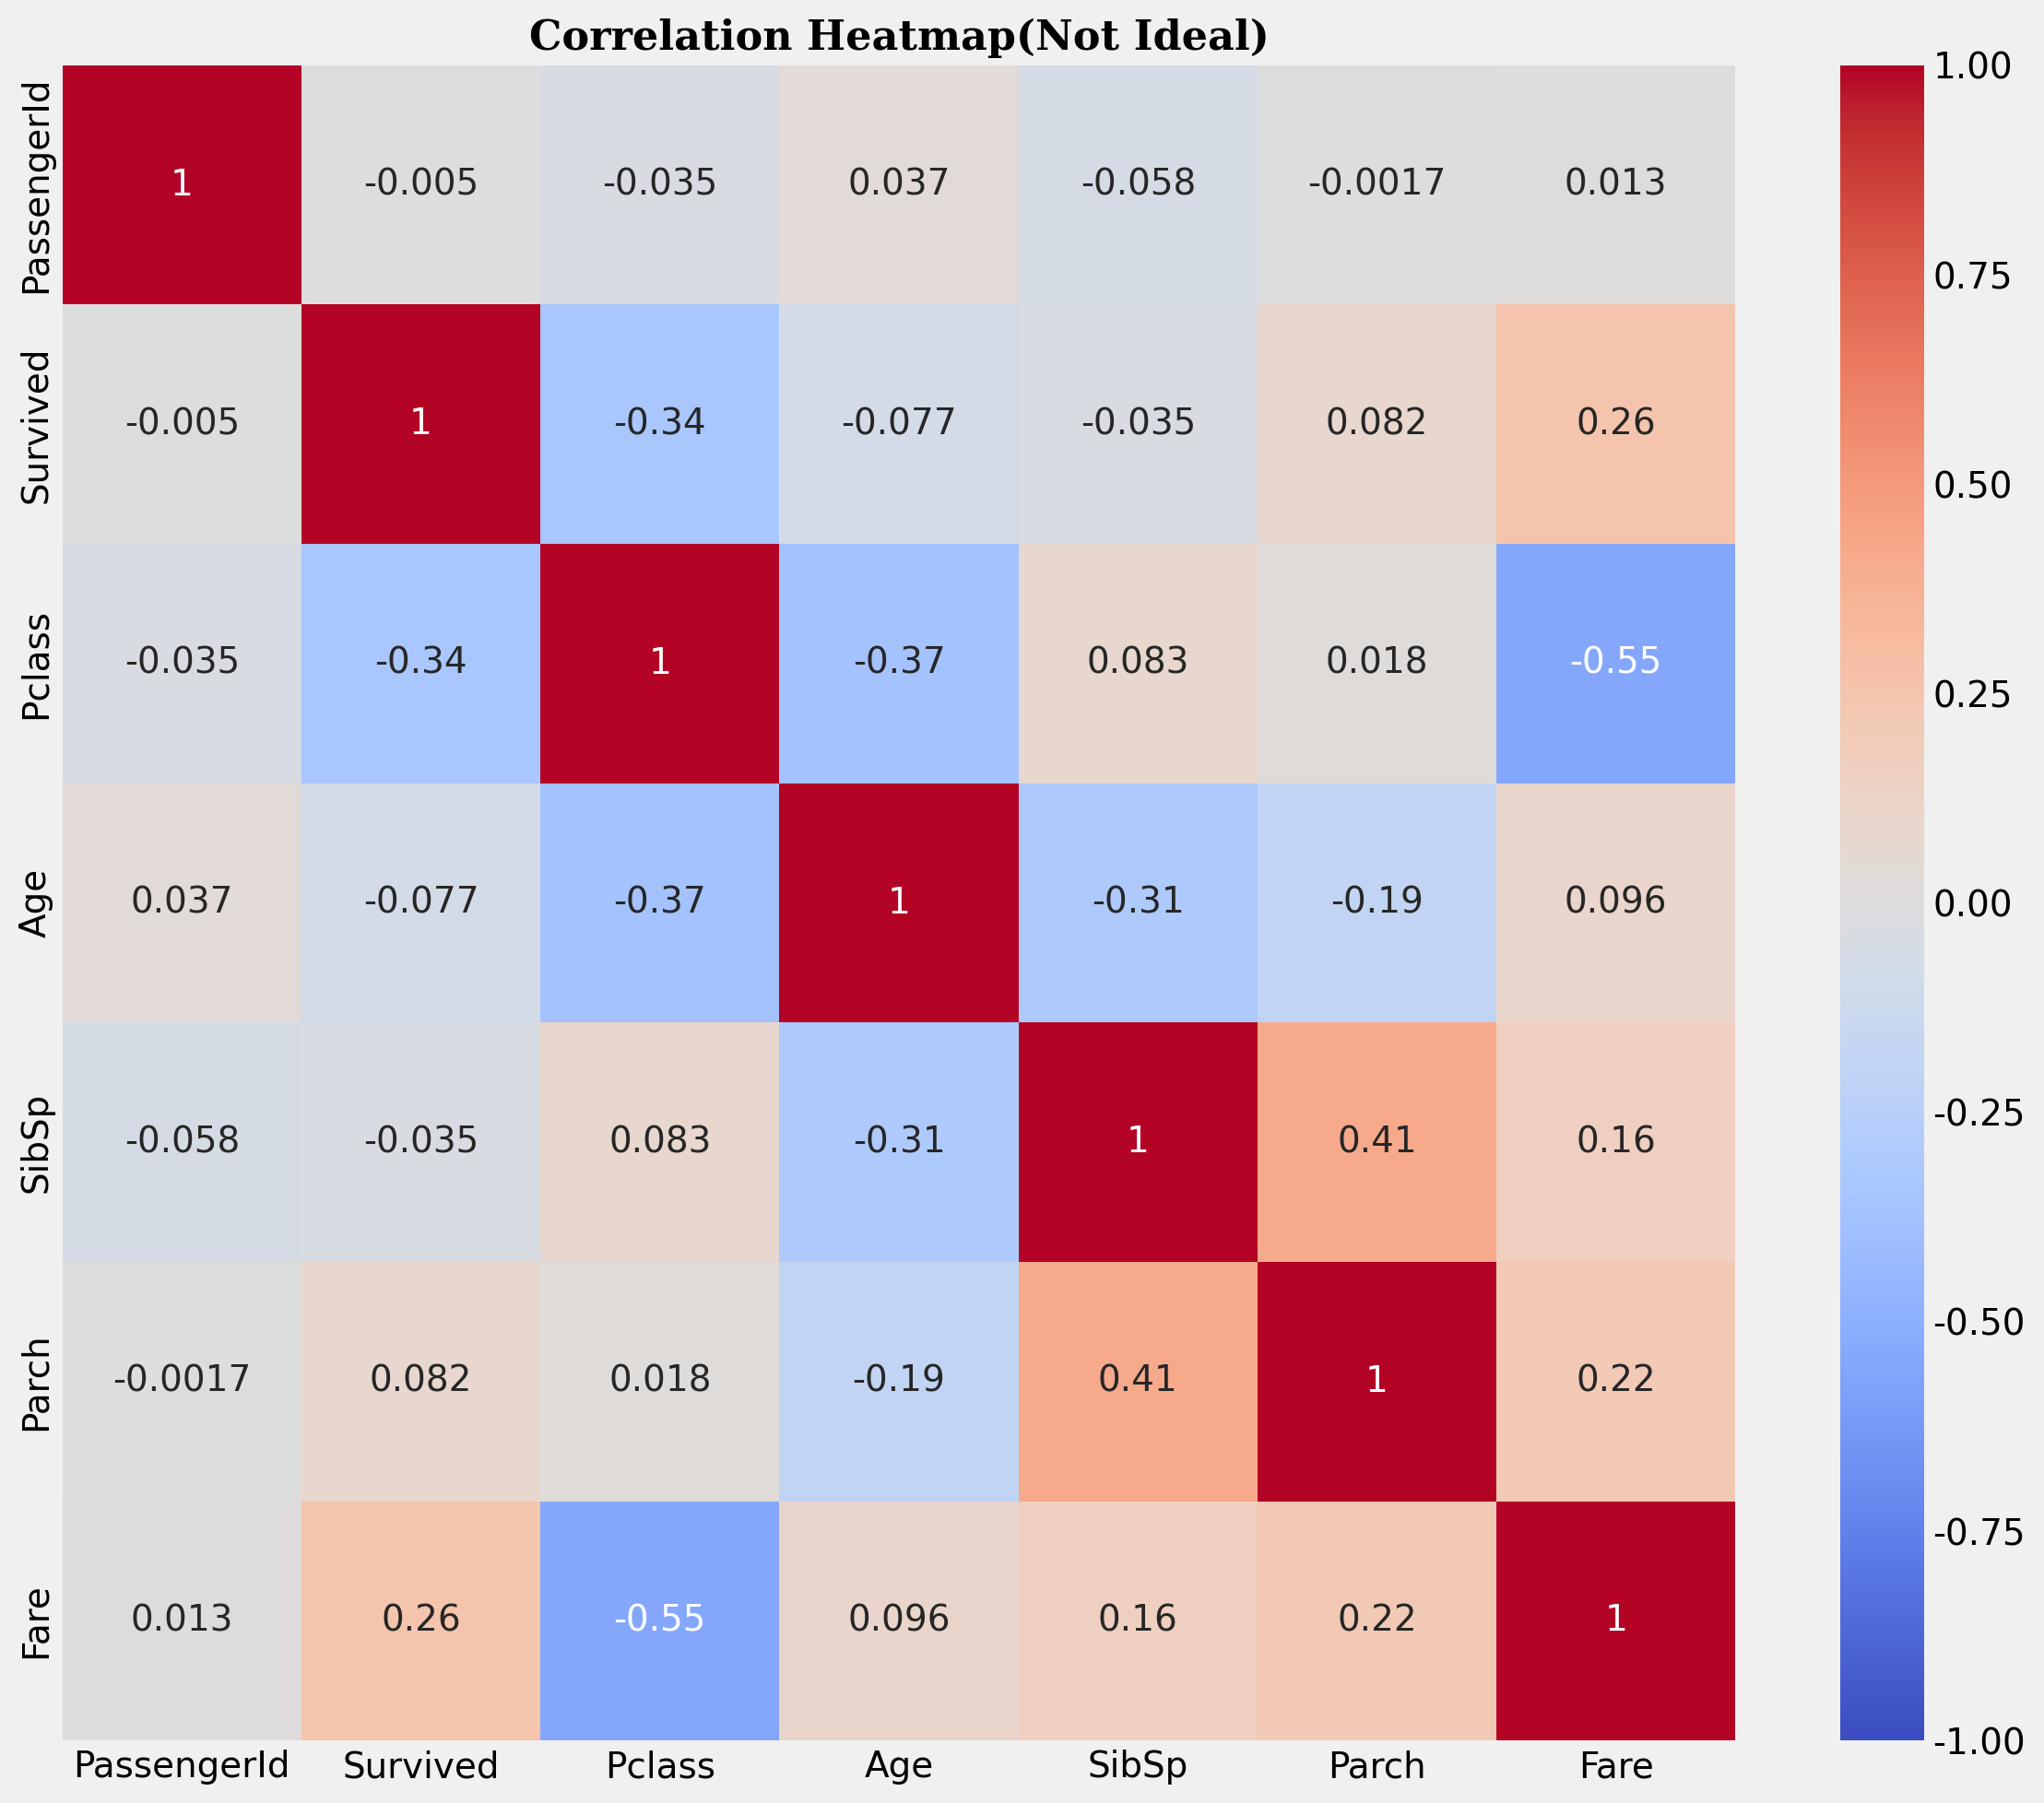

In [ ]:
numeric_train = ori_train.select_dtypes(include=[np.number])
# Figure와 Axes 생성
fig, ax = plt.subplots(figsize=(12, 10))  # Figure 크기 설정

# Heatmap 시각화
sns.heatmap(numeric_train.corr(),
            annot=True,           # 상관계수 값을 셀에 표시
            vmin=-1, vmax=1,      # 색상 범위 설정
            center=0,             # 색상 맵의 중앙값 설정
            cmap='coolwarm',      # 색상 맵 설정
            ax=ax)                # Axes 객체 지정

# 제목 추가
ax.set_title('Correlation Heatmap(Not Ideal)', fontsize=16, fontweight='bold', fontfamily='serif')

# 레이아웃 조정
plt.tight_layout()
plt.show()

위의 결과는 옳지 못합니다.
Survived는 이진값에 가까우므로, 연속형 - 연속형 상관관계에 사용되는 피어슨 상관계수를 이용하여 올바른 값을 도출하기 어렵습니다.데이터의 타입에 맞는 다른 검증 방법을 사용하는 것이 좋습니다.

In [ ]:
ori_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

대표적으로 아래 컬럼들에 대해 검정을 진행해보겠습니다.

### 범주형 변수 - 이진 변수 (Embarked, Sex)

In [ ]:
# 카이제곱 검정 : 범주형 변수와 이진 변수 간의 독립성 테스트
from scipy.stats import chi2_contingency

Embarked_Survived = pd.crosstab(ori_train['Survived'], ori_train['Embarked'])

chi2, p, dof, expected = chi2_contingency(Embarked_Survived)
print(f"Chi-square: {chi2}, p-value: {p}")
#chi-square이 클수록 독립성이 낮아져, 두 변수 간 유의미한 관계가 있을 가능성이 높아짐
#p-value 0.05 이하일 때 통계적으로 유의미하다는 결론

Chi-square: 26.48914983923762, p-value: 1.769922284120912e-06


In [ ]:
Sex_Survived = pd.crosstab(ori_train['Sex'], ori_train['Survived'])

chi2, p, dof, expected = chi2_contingency(Sex_Survived)
print(f"Chi-square: {chi2}, p-value: {p}")

Chi-square: 260.71702016732104, p-value: 1.1973570627755645e-58


두 값으로 미루어볼 때, Sex와 Survived 간의 강한 상관관계를 확인할 수 있습니다.

### 순서 척도 - 이진 변수 (Pclass, SibSp, Parch)

In [ ]:
# Spearman's Rank Correlation 계산
from scipy.stats import spearmanr

correlation, p_value = spearmanr(ori_train['Survived'], ori_train['Pclass'])
print(f"Spearman's Rank Correlation: {correlation:.2f}")
print(f"p-value: {p_value:.4f}")
#우연이 아닌 약한 상관관계를 가지고 있을 가능성

Spearman's Rank Correlation: -0.34
p-value: 0.0000


In [ ]:
#Pclass를 순서 척도가 아닌 범주형 변수로 취급한다면?
Pclass_Survived = pd.crosstab(ori_train['Pclass'], ori_train['Survived'])

chi2, p, dof, expected = chi2_contingency(Pclass_Survived)
print(f"Chi-square: {chi2}, p-value: {p}")
#Pclass의 값이 생존 확률에 영향을 미친다.

Chi-square: 102.88898875696056, p-value: 4.549251711298793e-23


### 연속형 변수 - 이진 변수 (Age, Fare)

In [ ]:
#Age에 결측치 값이 있었으므로, 결측값 row를 제외하여 따로 샘플을 만들었습니다.
sample_train = ori_train.copy()

In [ ]:
sample_train = sample_train.dropna(subset=['Age'])

In [ ]:
sample_train = sample_train[['Age', 'Survived']]

In [ ]:
# 점-이분 상관계수 (One scale naturally dichotomous(nominal), one scale interval or ratio)
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(sample_train['Survived'], sample_train['Age'])
print(f"Point-Biserial Correlation: {corr:.2f}")
print(f"p-value: {p_value:.4f}")
#거의 관계가 없으며, 유의하지 않다고 결과가 나왔습니다.

Point-Biserial Correlation: -0.08
p-value: 0.0391


그런데 나이가 적다고 많이 살고, 나이가 많다고 적게 산 건 아니었습니다. 오히려 어린 연령대와 나이 많은 연령대의 생존율이 높았으니까요. 이렇게 판단하면 안될 것 같습니다.
이렇게 수치형 변수가 비선형적인 경우는 어떻게 할까요? 팀원과 고민해보세요.

이런 검정을 통해 모델의 성능에 좋지 않은 영향을 끼치며, 과적합 확률을 높이는 피쳐들을 제외하도록 합니다.

# 피쳐 선택

## 결측치 처리

컬럼 중, PassengerId, Name, Ticket, Cabin, SibSp, Parch는 드랍하겠습니다.

피쳐 선택 시에는 다중공선성을 확인하여 정말 모델링에 사용할 피쳐를 선택할 것입니다. 이에 결측값, 이상치 등은 분석 결과를 왜곡시킬 수 있으며, 모델의 신뢰성을 저하시킬 수 있습니다. 따라서 결측치 처리의 순서가 선행되어야 합니다.

In [ ]:
input_train = ori_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1)

In [ ]:
input_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [ ]:
#사용할 것 중에서는 Embarked와 Age의 결측치만이 있네요.
input_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
Fare,0
Embarked,2


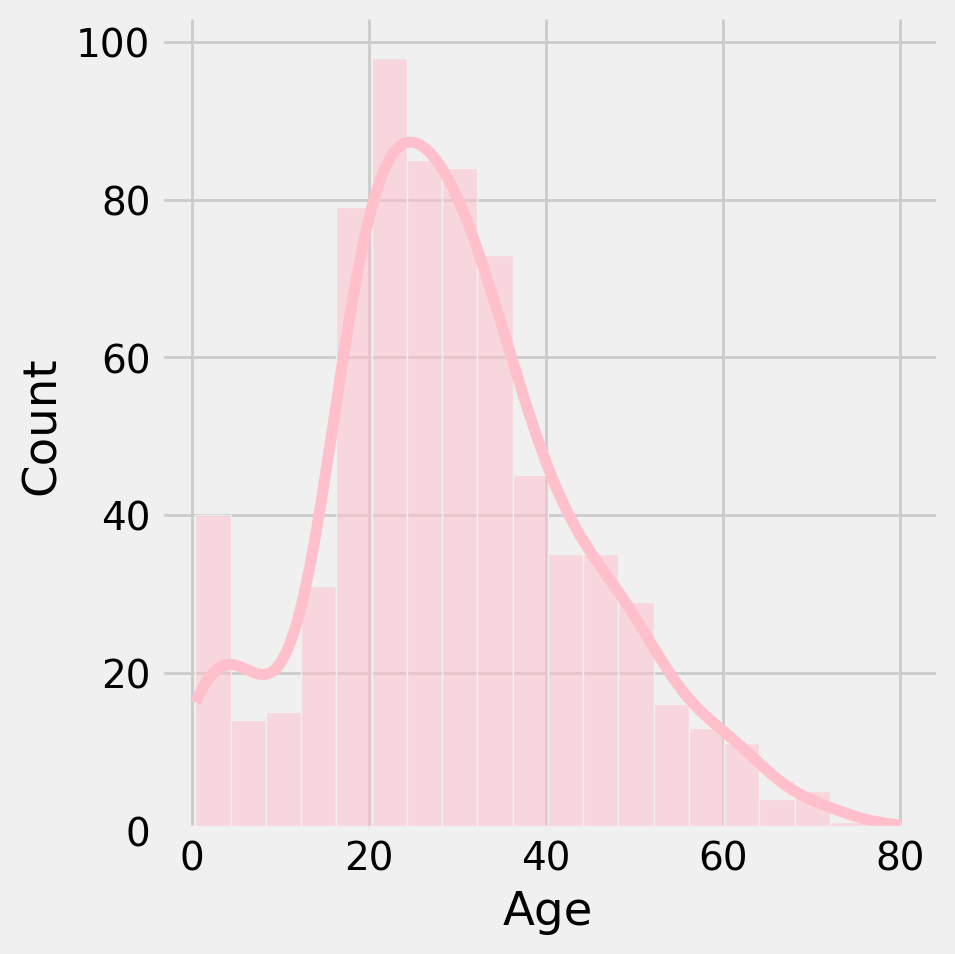

In [ ]:
#Mean or Median? 데이터 분포를 확인해 결정하기!
sns.displot(input_train['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

In [ ]:
from scipy.stats import skew
# NaN 값 제거
age_data = input_train['Age'].dropna()

# 왜도 계산
age_skewness = skew(age_data)
print(f"Age Skewness: {age_skewness}")

Age Skewness: 0.3882898514698657


데이터 분포가 정규분포의 모양에서 크게 벗어나 왜곡되거나 쏠리지는 않았습니다.

In [ ]:
print(input_train['Age'].mean())
print(input_train['Age'].median())
#실제로 거의 비슷하네요. median을 선택하겠습니다.

29.69911764705882
28.0


In [ ]:
input_train['Age'].fillna(input_train['Age'].median(), inplace=True)

In [ ]:
input_train['Embarked'].fillna(input_train['Embarked'].mode()[0], inplace=True)

Embarked는 범주형 변수이므로 Mode(최빈값)으로 결측치를 보완했습니다.

## 다중 공선성의 확인

다만, 다중공선성이 있다면 문제가 됩니다. 예를 들어, Age가 높을 수록 돈이 많아 Pclass 등급이 높을 수 있고, Fare를 많이 지불할수록 Pclass가 높아질 수 있겠죠.

In [ ]:
vif_test = input_train.copy()

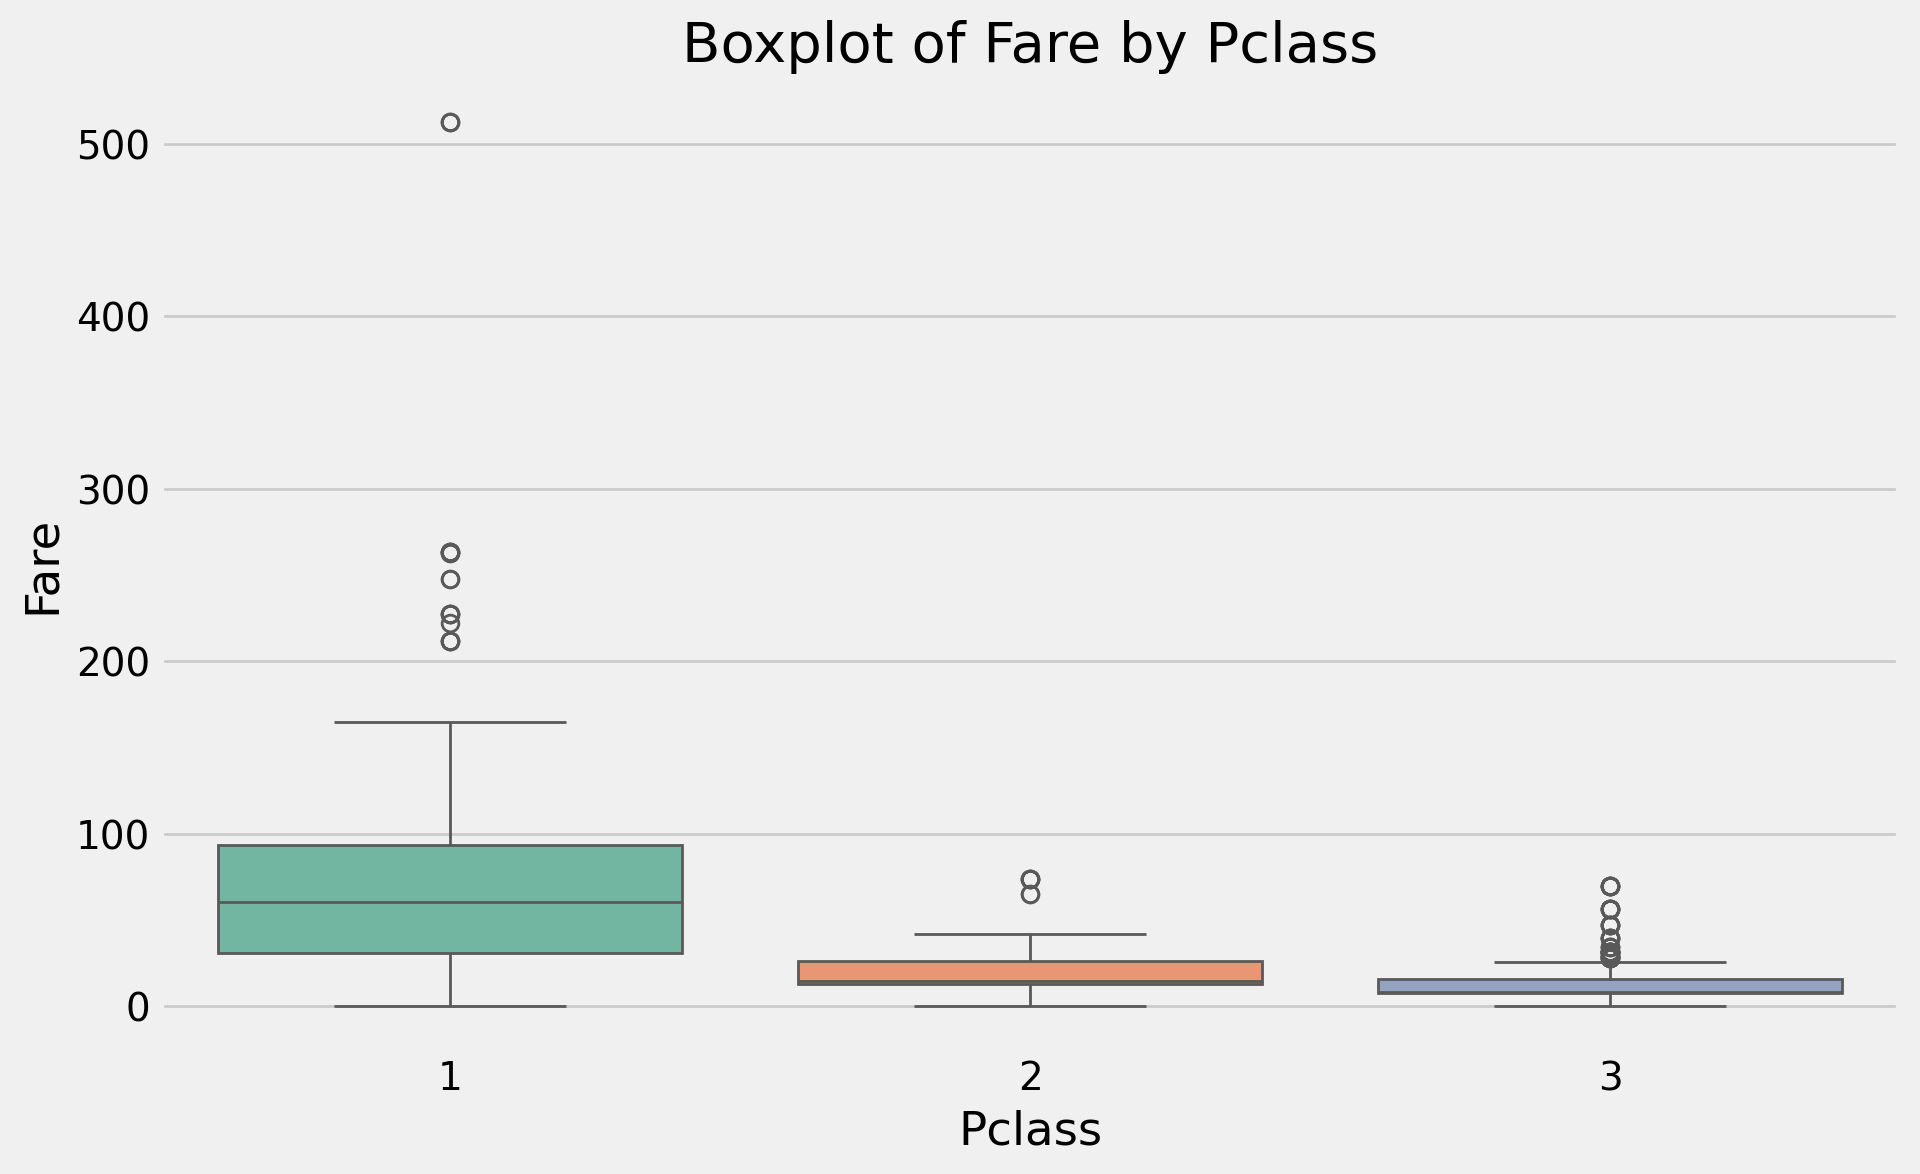

In [ ]:
pclass_fare = vif_test[['Pclass', 'Fare']]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=pclass_fare, palette='Set2')
plt.title('Boxplot of Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

1이 분산성이 크고, 2/3에서 차이가 나지 않습니다.

### VIF(Variance Inflation Factor)를 이용한 다중 공선성 확인하기

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 범주형 변수와 수치형 변수를 선택
categorical_vars = ['Pclass', 'Embarked', 'Sex']  # 예시
numeric_vars = ['Survived', 'Age', 'Fare' ]

# 범주형 변수를 더미 변수로 변환
X_categorical = pd.get_dummies(vif_test[categorical_vars], drop_first=True)

In [ ]:
# 수치형 변수와 더미 변수 결합
X_numeric = vif_test[numeric_vars]
X = pd.concat([X_numeric, X_categorical], axis=1)

In [ ]:
X = sm.add_constant(X)

X = X.astype(float)  # dummy 결과로 boolean 값을 가짐 -> float으로 변환

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)
#다중공선성은 띠지 않는 것으로 결과가 나왔습니다. (보통 5 이상을 유의하게 판단)

     Variable        VIF
0       const  45.637493
1    Survived   1.633894
2         Age   1.197552
3        Fare   1.510501
4      Pclass   1.886545
5  Embarked_Q   1.487443
6  Embarked_S   1.452153
7    Sex_male   1.448357


### 이진 변수 생성

In [ ]:
#Pclass를 1과 2/3으로 분리해보겠습니다.
vif_test['Pclass_1'] = (vif_test['Pclass'] == 1).astype(int)

categorical_vars = ['Embarked', 'Sex']  # Pclass는 이진 변수로 변환했으므로 제외
numeric_vars = ['Survived', 'Age', 'Fare', 'Pclass_1']

X_categorical = pd.get_dummies(vif_test[categorical_vars], drop_first=True)

X_numeric = vif_test[numeric_vars]
X = pd.concat([X_numeric, X_categorical], axis=1)

X = X.astype(float)  # 모든 데이터를 float 타입으로 변환

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     Variable        VIF
0       const  17.670159
1    Survived   1.571972
2         Age   1.168898
3        Fare   1.616279
4    Pclass_1   1.902379
5  Embarked_Q   1.463880
6  Embarked_S   1.479890
7    Sex_male   1.454234


1로 분리하고 보아도 다중 공선성을 판단하지는 않습니다.

### 그 외 다중 공선성을 처치하는 방법?

변수의 통합이나 제거, 차원의 축소, 정규화 또는 표준화를 통해 다중 공선성의 영향을 줄일 수 있습니다.
또한, 걱정된다면 릿지 회귀처럼 정규화가 포함된 모델을 사용해 모델링 단계에서 다중 공선성을 줄일 수도 있습니다.

# 이상치 판단

이상치 처리는 결측치 처리 이후 수행하는 것이 일반적이에요. 결측치가 이상치로 오인될 가능성을 줄이고 이상치의 처리가 더 명확해지기 때문입니다.

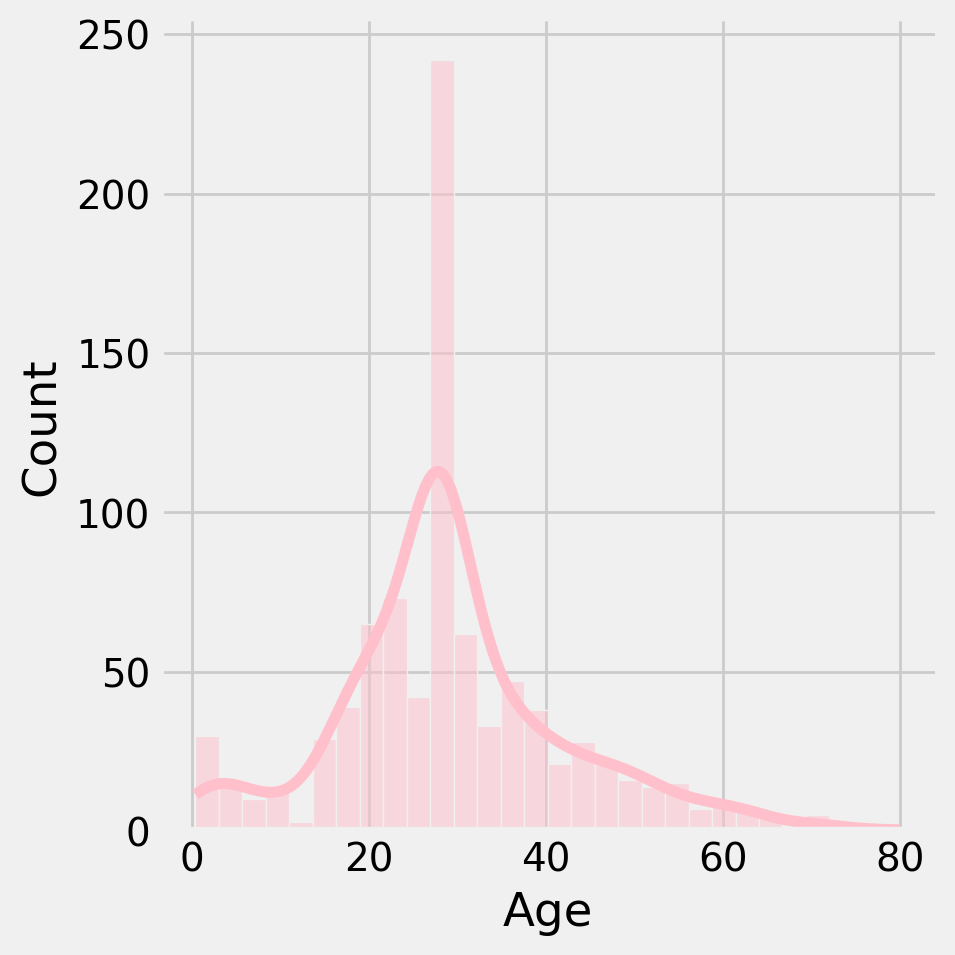

In [ ]:
sns.displot(input_train['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

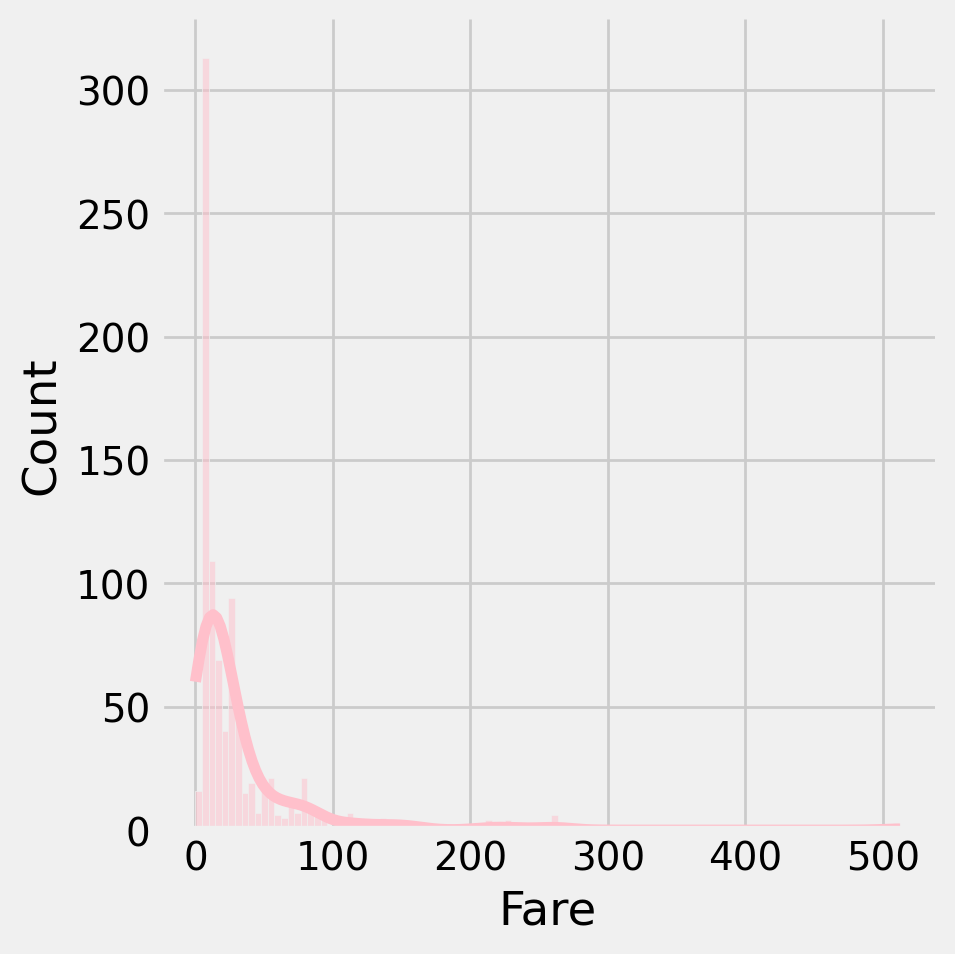

In [ ]:
sns.displot(input_train['Fare'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

In [ ]:
from scipy.stats import skew
# NaN 값 제거
fare_data = input_train['Fare'].dropna()

# 왜도 계산
fare_skewness = skew(fare_data)
print(f"Fare Skewness: {fare_skewness}")

Fare Skewness: 4.7792532923723545


Original Fare Skewness: 4.7793
Log Transformed Fare Skewness: 0.3943
Box-Cox Transformed Fare Skewness: 0.2175


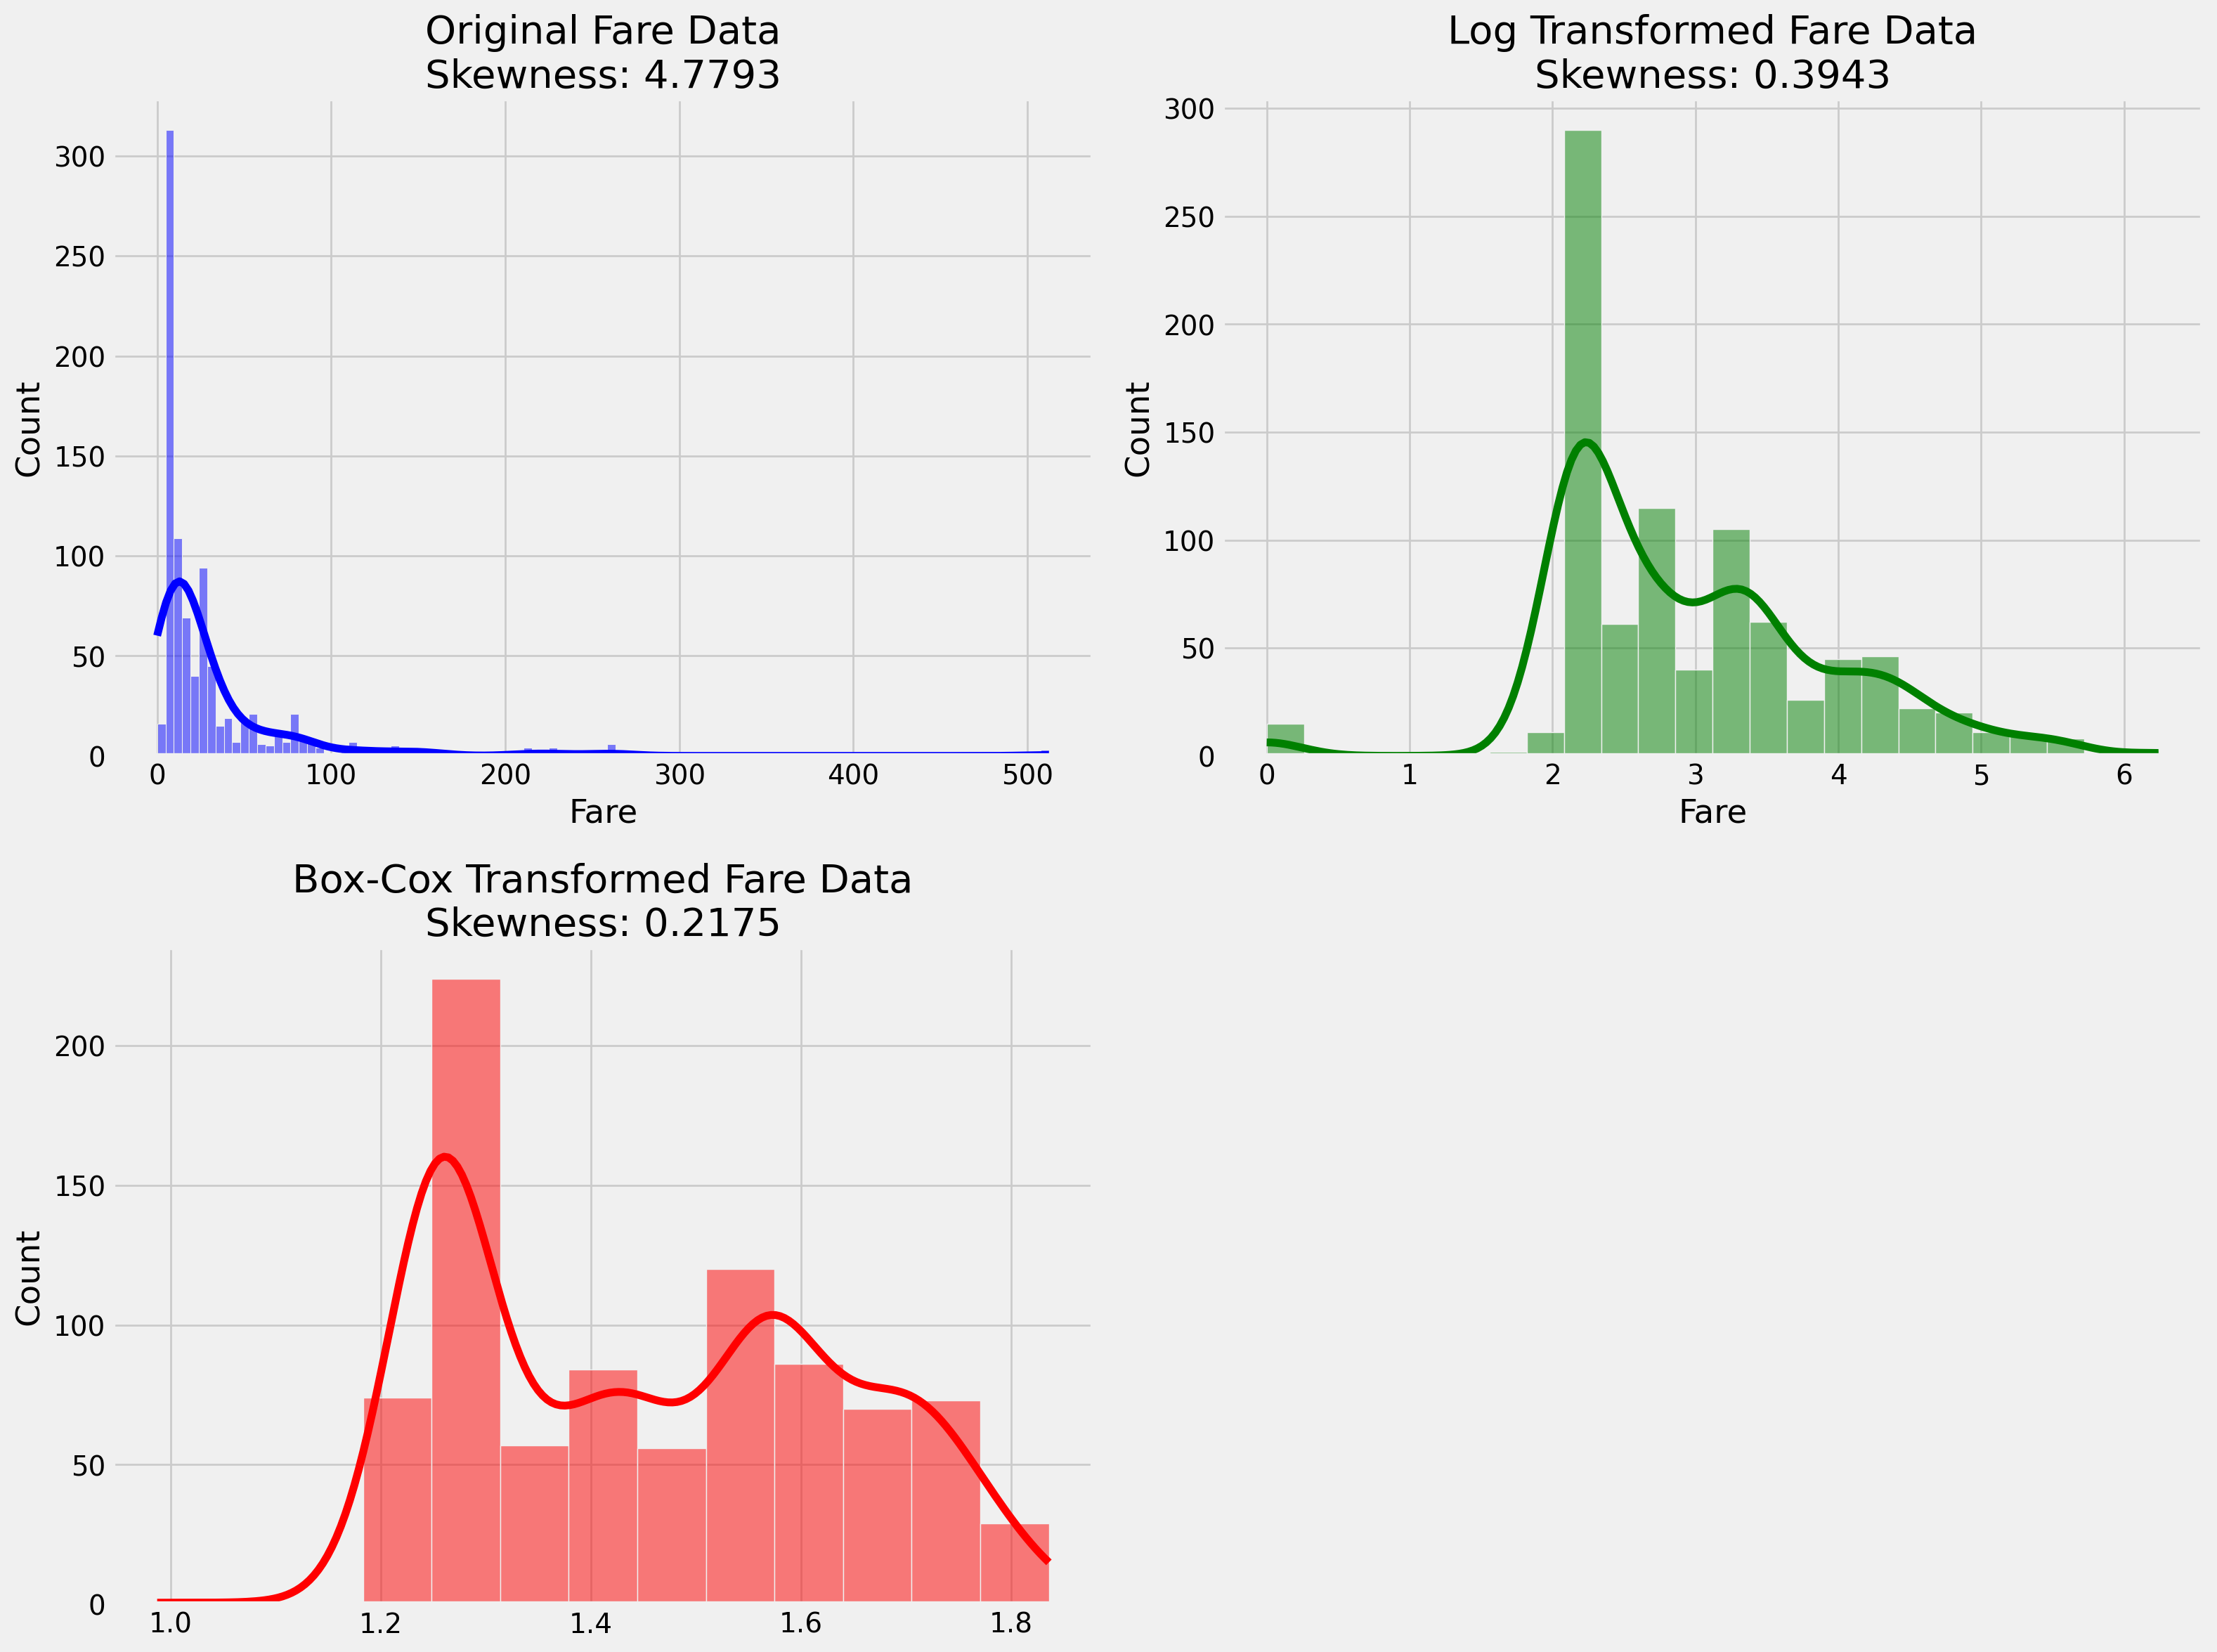

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, boxcox
from sklearn.preprocessing import PowerTransformer

# NaN 값 제거
fare_data = input_train['Fare'].dropna()

# 원본 데이터 왜도 계산
original_skewness = skew(fare_data)
print(f"Original Fare Skewness: {original_skewness:.4f}")

# 1. 로그 변환
log_transformed = np.log1p(fare_data)  # log1p는 log(1+x)를 계산해 0값 처리 가능
log_skewness = skew(log_transformed)
print(f"Log Transformed Fare Skewness: {log_skewness:.4f}")

# 2. Box-Cox 변환 (양수 값에만 적용)
boxcox_transformed, _ = boxcox(fare_data[fare_data > 0])  # Box-Cox는 양수 데이터만 허용
boxcox_skewness = skew(boxcox_transformed)
print(f"Box-Cox Transformed Fare Skewness: {boxcox_skewness:.4f}")


# 4. 그래프 그리기
plt.figure(figsize=(16, 12))

# 원본 데이터
plt.subplot(2, 2, 1)
sns.histplot(fare_data, kde=True, color='blue')
plt.title(f"Original Fare Data\nSkewness: {original_skewness:.4f}")

# 로그 변환 데이터
plt.subplot(2, 2, 2)
sns.histplot(log_transformed, kde=True, color='green')
plt.title(f"Log Transformed Fare Data\nSkewness: {log_skewness:.4f}")

# Box-Cox 변환 데이터
plt.subplot(2, 2, 3)
sns.histplot(boxcox_transformed, kde=True, color='red')
plt.title(f"Box-Cox Transformed Fare Data\nSkewness: {boxcox_skewness:.4f}")


plt.tight_layout()
plt.show()


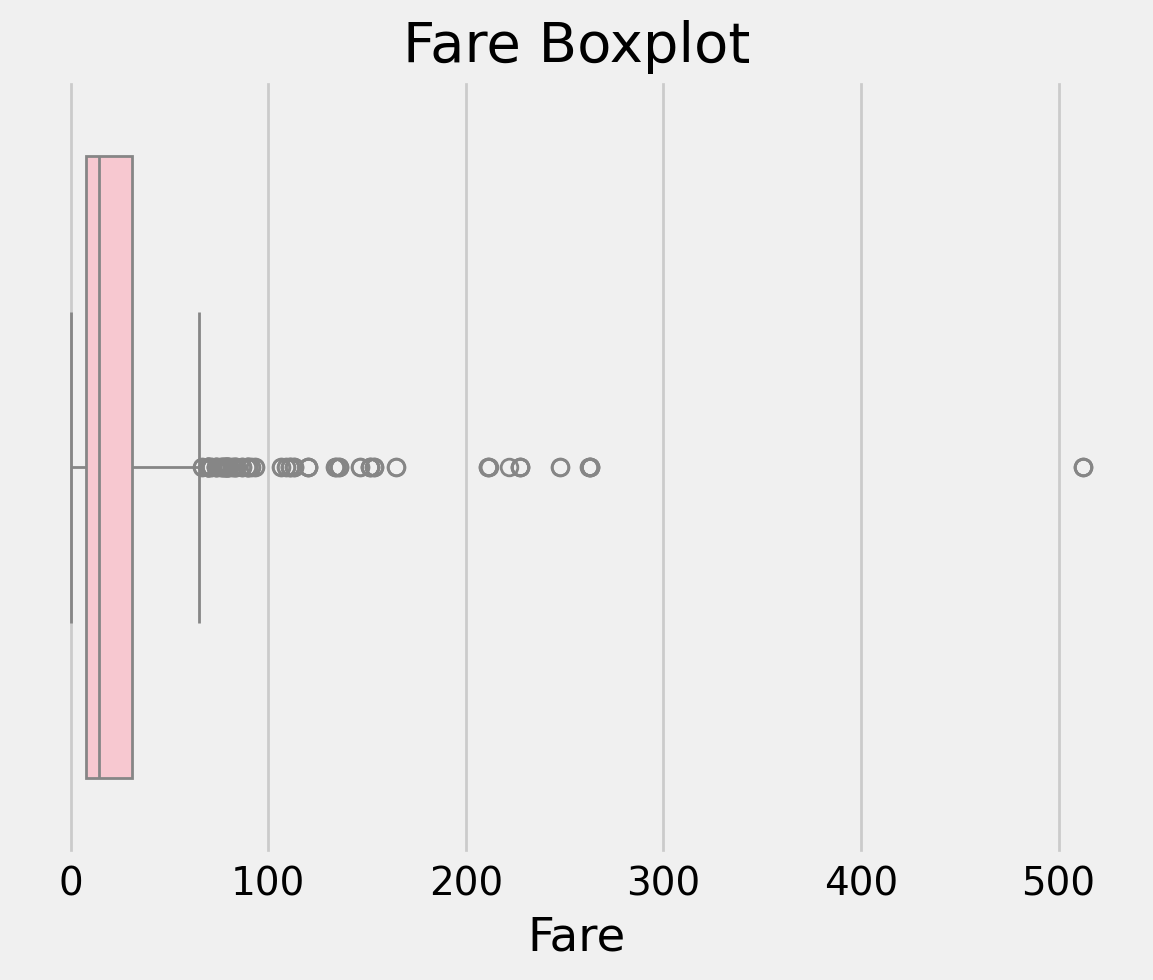

In [ ]:
# IQR을 이용한 이상치 탐지
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_fare = detect_outliers_iqr(input_train, 'Fare')

sns.boxplot(x=input_train['Fare'], color='pink')
plt.title('Fare Boxplot')
plt.show()

## Z-Score

In [ ]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)

정규분포에 가까운 Age는 Z-Score을 이용하여 이상치를 탐지하겠습니다.

In [ ]:
from scipy import stats

z_scores = stats.zscore(input_train['Age'])
abs_z_scores = np.abs(z_scores)
age_threshold = 3
age_outliers = input_train[abs_z_scores > age_threshold]

print("Age 이상치 (Z-score 기준):")
print(age_outliers)

Age 이상치 (Z-score 기준):
     Survived  Pclass   Sex   Age     Fare Embarked
96          0       1  male  71.0  34.6542        C
116         0       3  male  70.5   7.7500        Q
493         0       1  male  71.0  49.5042        C
630         1       1  male  80.0  30.0000        S
672         0       2  male  70.0  10.5000        S
745         0       1  male  70.0  71.0000        S
851         0       3  male  74.0   7.7750        S


In [ ]:
input_train = input_train[abs_z_scores <= age_threshold]

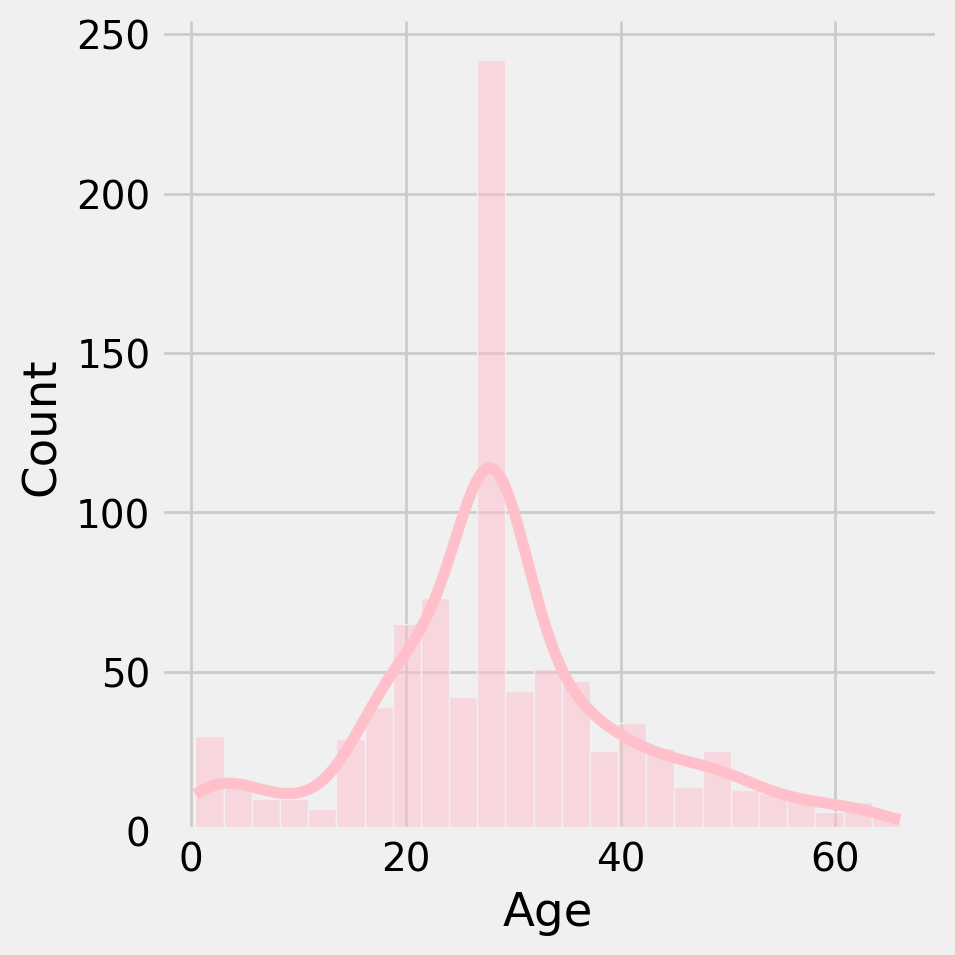

In [ ]:
#이상치 처리 후 모습
sns.displot(input_train['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

## IQR

비정규분포를 가지고 극단적 이상치가 많은 Fare 칼럼에서는 IQR으로 이상치를 판별하고 처리하겠습니다.

In [ ]:
# 3.2 Fare: IQR을 사용한 이상치 탐지 및 처리
Q1 = input_train['Fare'].quantile(0.25)
Q3 = input_train['Fare'].quantile(0.75)
IQR = Q3 - Q1
fare_lower_bound = Q1 - 1.5 * IQR
fare_upper_bound = Q3 + 1.5 * IQR

fare_outliers = input_train[(input_train['Fare'] < fare_lower_bound) | (input_train['Fare'] > fare_upper_bound)]

print("\nFare 이상치 (IQR 기준):")
print(fare_outliers)

# 이상치를 제거하거나 대체 (여기서는 제거)
input_train = input_train[(input_train['Fare'] >= fare_lower_bound) & (input_train['Fare'] <= fare_upper_bound)]


Fare 이상치 (IQR 기준):
     Survived  Pclass     Sex   Age      Fare Embarked
1           1       1  female  38.0   71.2833        C
27          0       1    male  19.0  263.0000        S
31          1       1  female  28.0  146.5208        C
34          0       1    male  28.0   82.1708        C
52          1       1  female  49.0   76.7292        C
..        ...     ...     ...   ...       ...      ...
846         0       3    male  28.0   69.5500        S
849         1       1  female  28.0   89.1042        C
856         1       1  female  45.0  164.8667        S
863         0       3  female  28.0   69.5500        S
879         1       1  female  56.0   83.1583        C

[115 rows x 6 columns]


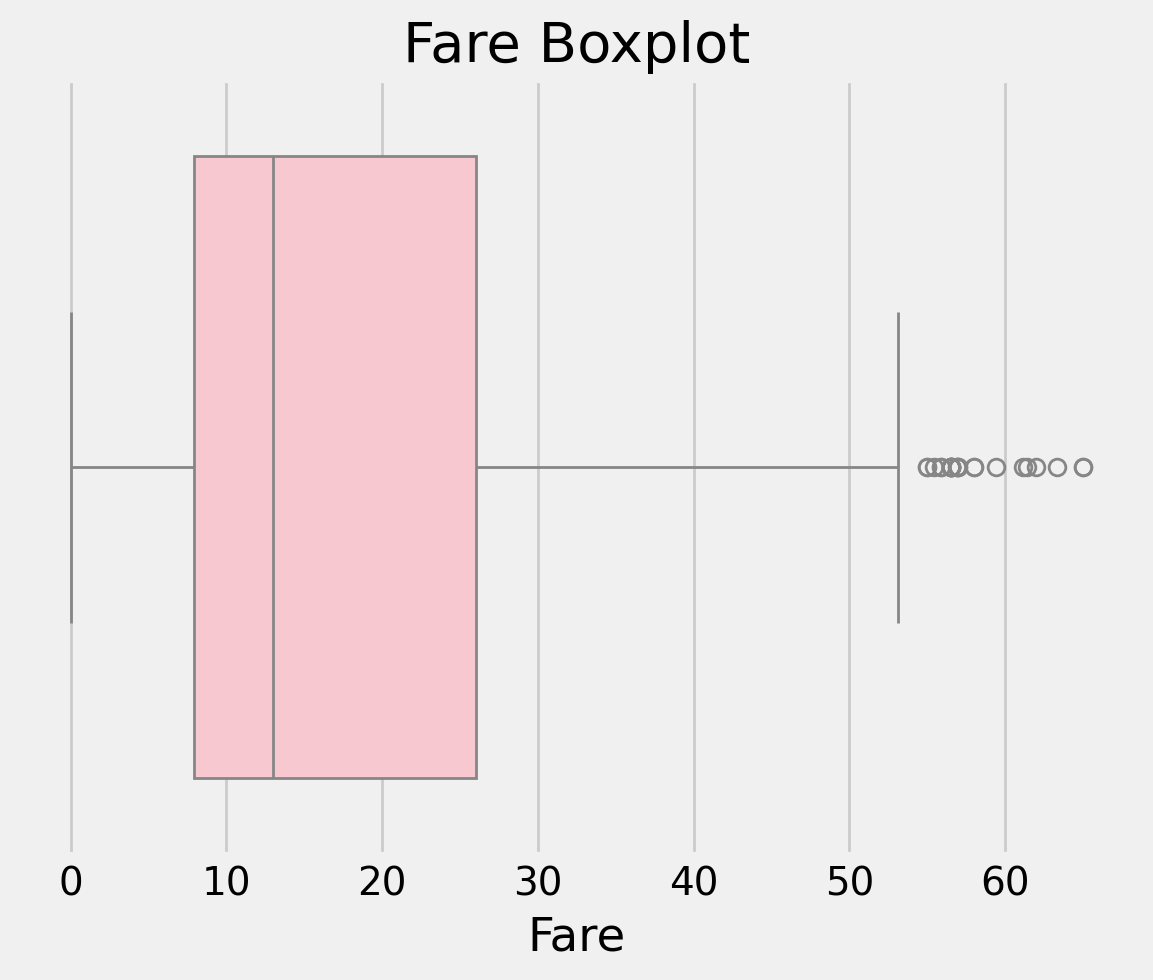

In [ ]:
# IQR을 이용한 이상치 탐지
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_fare = detect_outliers_iqr(input_train, 'Fare')

sns.boxplot(x=input_train['Fare'], color='pink')
plt.title('Fare Boxplot')

#정제 완료된 모습
plt.show()

# 스케일

In [ ]:
input_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  769 non-null    int64  
 1   Pclass    769 non-null    int64  
 2   Sex       769 non-null    object 
 3   Age       769 non-null    float64
 4   Fare      769 non-null    float64
 5   Embarked  769 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 42.1+ KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 스케일러 초기화
scaler = MinMaxScaler()

# 훈련 데이터와 테스트 데이터를 스케일링
input_scaled = input_train.copy()

# 연속형 변수만 스케일링
input_scaled[['Age', 'Fare']] = scaler.fit_transform(input_scaled[['Age', 'Fare']])

In [ ]:
# Robust Scaler 써보기

# 인코딩

In [ ]:
# 범주형 변수를 원-핫 인코딩
input_processed = pd.get_dummies(input_scaled, columns=['Pclass', 'Embarked', 'Sex'], drop_first=True)
input_processed

,Survived,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,0.329064,0.111538,False,True,False,True,True
2,1,0.390058,0.121923,False,True,False,True,False
3,1,0.527295,0.816923,False,False,False,True,False
4,0,0.527295,0.123846,False,True,False,True,True
5,0,0.420555,0.130128,False,True,True,False,True
...,...,...,...,...,...,...,...,...
886,0,0.405306,0.200000,True,False,False,True,True
887,1,0.283318,0.461538,False,False,False,True,False
888,0,0.420555,0.360769,False,True,False,True,False
889,1,0.390058,0.461538,False,False,False,False,True


In [69]:
input_processed

,Survived,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,0.329064,0.111538,False,True,False,True,True
2,1,0.390058,0.121923,False,True,False,True,False
3,1,0.527295,0.816923,False,False,False,True,False
4,0,0.527295,0.123846,False,True,False,True,True
5,0,0.420555,0.130128,False,True,True,False,True
...,...,...,...,...,...,...,...,...
886,0,0.405306,0.200000,True,False,False,True,True
887,1,0.283318,0.461538,False,False,False,True,False
888,0,0.420555,0.360769,False,True,False,True,False
889,1,0.390058,0.461538,False,False,False,False,True


# 데이터 분할

훈련 데이터와 테스트 데이터로 나누어 모델을 평가할 수 있도록 합니다.

In [70]:
from sklearn.model_selection import train_test_split

X = input_processed.drop('Survived', axis=1)  # 'Survived'를 제외한 모든 feature
y = input_processed['Survived']  # 타깃 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 모델 활용

랜덤포레스트의 장점:
앙상블 기법이므로 과적합이 잘 일어나지 않는다.
앙상블이므로 결측치나 이상치에 강하다.
회귀 알고리즘이 아닌 의사결정나무 알고리즘에 기반한 기법이기 때문에 scaling, 정규화 과정이 필요 없다.
비선형적 데이터에 강한데, 이 역시 회귀 알고리즘이 아니라 의사결정나무이기 때문이다.
새로운 데이터가 들어와도 크게 영향을 받지 않는다.

### 앙상블


In [71]:
# 필요한 추가 모델 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,recall_score
from sklearn.metrics import f1_score, roc_auc_score

# Decision Tree 성능 안 좋아서 제외
# DecisionTreeClassifier 정확도: 0.7792
# DecisionTreeClassifier 정밀도: 0.7991

# 기존 모델 정의
lr_clf = LogisticRegression(max_iter=1000)
knn_clf = KNeighborsClassifier(n_neighbors=8)
# dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier(n_estimators=100)
svm_clf = SVC(probability=True)  # SVC는 'soft' voting을 위해 확률을 출력해야 하므로 probability=True 설정
gbm_clf = GradientBoostingClassifier()  # GBM 모델 추가

# 앙상블 모델 (Voting Classifier) 정의
vo_clf = VotingClassifier(estimators=[
    ('LR', lr_clf),
    ('KNN', knn_clf),
    # ('DT', dt_clf),
    ('RF', rf_clf),
    ('SVM', svm_clf),
    ('GBM', gbm_clf)  # GBM 모델 추가
], voting='soft')

# 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 앙상블 모델 학습 및 예측
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('보팅 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))
print('보팅 분류기 정밀도: {0:.4f}'.format(precision_score(y_test,pred, average='weighted')))
print('보팅 분류기 재현율: {0:.4f}'.format(recall_score(y_test,pred)))

# 개별 모델들의 정확도 평가
classifiers = [lr_clf, knn_clf, rf_clf, svm_clf, gbm_clf]
for clf in classifiers:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    class_name = clf.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
    print('{0} 정밀도: {1:.4f}'.format(class_name,precision_score(y_test, pred, average='weighted')))
    print('보팅 분류기 재현율: {0:.4f}'.format(recall_score(y_test,pred)))

보팅 분류기 정확도: 0.8658
보팅 분류기 정밀도: 0.8623
보팅 분류기 재현율: 0.6825
LogisticRegression 정확도: 0.8095
LogisticRegression 정밀도: 0.8061
보팅 분류기 재현율: 0.6190
KNeighborsClassifier 정확도: 0.8485
KNeighborsClassifier 정밀도: 0.8436
보팅 분류기 재현율: 0.6190
RandomForestClassifier 정확도: 0.8182
RandomForestClassifier 정밀도: 0.8201
보팅 분류기 재현율: 0.6825
SVC 정확도: 0.8312
SVC 정밀도: 0.8292
보팅 분류기 재현율: 0.4921
GradientBoostingClassifier 정확도: 0.8485
GradientBoostingClassifier 정밀도: 0.8445
보팅 분류기 재현율: 0.6667


In [78]:
# K fold 사용
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# StratifiedKFold 사용 (분류 문제에서 클래스 비율을 유지하기 위해)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 성능 저장할 리스트
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

# K-Fold 교차 검증을 통한 앙상블 모델 평가
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 앙상블 모델 학습
    vo_clf.fit(X_train, y_train)
    pred = vo_clf.predict(X_test)
    prob = vo_clf.predict_proba(X_test)[:, 1]

    # 성능 측정 및 저장
    accuracy_list.append(accuracy_score(y_test, pred))
    precision_list.append(precision_score(y_test, pred, average='weighted'))
    recall_list.append(recall_score(y_test, pred))
    f1_list.append(f1_score(y_test, pred))
    auc_list.append(roc_auc_score(y_test, prob))

# 교차 검증 성능 평균 출력
print(f'KFold 교차 검증 보팅 분류기 평균 정확도: {np.mean(accuracy_list):.4f}')
print(f'KFold 교차 검증 보팅 분류기 평균 정밀도: {np.mean(precision_list):.4f}')
print(f'KFold 교차 검증 보팅 분류기 평균 재현율: {np.mean(recall_list):.4f}')
print(f'KFold 교차 검증 보팅 분류기 평균 F1-Score: {np.mean(f1_list):.4f}')
print(f'KFold 교차 검증 보팅 분류기 평균 AUC: {np.mean(auc_list):.4f}')


KFold 교차 검증 보팅 분류기 평균 정확도: 0.8258
KFold 교차 검증 보팅 분류기 평균 정밀도: 0.8267
KFold 교차 검증 보팅 분류기 평균 재현율: 0.6107
KFold 교차 검증 보팅 분류기 평균 F1-Score: 0.7048
KFold 교차 검증 보팅 분류기 평균 AUC: 0.8559


In [ ]:
# 필요한 추가 모델 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
import lightgbm as lgb

# 기존 모델 정의
lr_clf = LogisticRegression(max_iter=1000)
knn_clf = KNeighborsClassifier(n_neighbors=8)
rf_clf = RandomForestClassifier(n_estimators=100)
svm_clf = SVC(probability=True)  # 'soft' voting을 위해 확률 출력
gbm_clf = GradientBoostingClassifier()  # Gradient Boosting
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # XGBoost 추가
lgb_clf = lgb.LGBMClassifier()  # LightGBM 추가

# 앙상블 모델 (Voting Classifier) 정의
vo_clf = VotingClassifier(estimators=[
    ('LR', lr_clf),
    ('KNN', knn_clf),
    ('RF', rf_clf),
    ('SVM', svm_clf),
    ('GBM', gbm_clf),
    ('XGB', xgb_clf),  # XGBoost 모델 추가
    ('LGBM', lgb_clf)  # LightGBM 모델 추가
], voting='soft')

# 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 앙상블 모델 학습 및 예측
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)

# 앙상블 모델 평가
print('보팅 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))
print('보팅 분류기 정밀도: {0:.4f}'.format(precision_score(y_test, pred, average='weighted')))
print('보팅 분류기 재현율: {0:.4f}'.format(recall_score(y_test, pred)))
print('보팅 분류기 F1-Score: {0:.4f}'.format(f1_score(y_test, pred)))
print('보팅 분류기 AUC: {0:.4f}'.format(roc_auc_score(y_test, vo_clf.predict_proba(X_test)[:, 1])))

# 개별 모델들의 정확도 평가
classifiers = [lr_clf, knn_clf, rf_clf, svm_clf, gbm_clf, xgb_clf, lgb_clf]
for clf in classifiers:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    class_name = clf.__class__.__name__
    print(f'{class_name} 정확도: {accuracy_score(y_test, pred):.4f}')
    print(f'{class_name} 정밀도: {precision_score(y_test, pred, average="weighted"):.4f}')
    print(f'{class_name} 재현율: {recall_score(y_test, pred):.4f}')
    print(f'{class_name} F1-Score: {f1_score(y_test, pred):.4f}')
    print(f'{class_name} AUC: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]):.4f}' if hasattr(clf, "predict_proba") else '')


[LightGBM] [Info] Number of positive: 199, number of negative: 339
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 538, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369888 -> initscore=-0.532695
[LightGBM] [Info] Start training from score -0.532695
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
from sklearn.model_selection import KFold, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 정의
lr_clf = LogisticRegression(max_iter=1000)
knn_clf = KNeighborsClassifier(n_neighbors=8)
rf_clf = RandomForestClassifier(n_estimators=100)
svm_clf = SVC(probability=True)
gbm_clf = GradientBoostingClassifier()

# 앙상블 모델 (Voting Classifier) 정의
vo_clf = VotingClassifier(estimators=[
    ('LR', lr_clf),
    ('KNN', knn_clf),
    ('RF', rf_clf),
    ('SVM', svm_clf),
    ('GBM', gbm_clf)
], voting='soft')

# 외부 루프: 데이터 분할용 KFold 정의
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 내부 루프: 모델 최적화를 위한 KFold
inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

# RandomizedSearchCV로 하이퍼파라미터 튜닝 (Logistic Regression 예시)
param_grid = {
    'LR__C': [0.01, 0.1, 1, 10],
    'KNN__n_neighbors': [3, 5, 8],
    'RF__n_estimators': [50, 100, 200],
    'GBM__n_estimators': [50, 100, 200],
}

# RandomizedSearchCV 설정 (내부 CV 적용)
random_search = RandomizedSearchCV(vo_clf, param_distributions=param_grid, cv=inner_cv, n_iter=10, scoring='accuracy', random_state=42)

# 외부 루프를 이용한 Nested Cross-Validation 진행
nested_scores = cross_val_score(random_search, X, y, cv=outer_cv, scoring='accuracy')

print(f'Nested CV Accuracy Scores: {nested_scores}')
print(f'Mean Nested CV Accuracy: {nested_scores.mean():.4f}')


Nested CV Accuracy Scores: [0.87662338 0.87012987 0.83766234 0.77272727 0.81699346]
Mean Nested CV Accuracy: 0.8348


### XGBOOST

In [ ]:
# xgboos 불러와 xgb로 명명
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtr = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)


params = { 'max_depth':3,
          'eta': 0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
           'early_stoppings':100
         }
num_rounds = 400


# 학습 데이터 세트와 eval 데이터 세트 명기 (조기중단 적용 목적)
# 또는 eval_list = [(dval,'eval')] 로도 가능
eval_list = [(dtr,'train'),(dtest,'test')]

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds ,
                      early_stopping_rounds=100, evals=eval_list )# 학습 데이터 세트와 test 데이터 세트 명기 (조기중단 적용 목적)


[0]	train-logloss:0.63962	test-logloss:0.59029
[1]	train-logloss:0.62224	test-logloss:0.57403
[2]	train-logloss:0.60652	test-logloss:0.55947
[3]	train-logloss:0.59219	test-logloss:0.54702
[4]	train-logloss:0.57911	test-logloss:0.53483
[5]	train-logloss:0.56714	test-logloss:0.52452
[6]	train-logloss:0.55613	test-logloss:0.51447
[7]	train-logloss:0.54603	test-logloss:0.50520
[8]	train-logloss:0.53669	test-logloss:0.49728
[9]	train-logloss:0.52809	test-logloss:0.48954
[10]	train-logloss:0.52070	test-logloss:0.48355
[11]	train-logloss:0.51327	test-logloss:0.47689
[12]	train-logloss:0.50702	test-logloss:0.47178
[13]	train-logloss:0.50124	test-logloss:0.46664
[14]	train-logloss:0.49521	test-logloss:0.46184
[15]	train-logloss:0.49023	test-logloss:0.45748
[16]	train-logloss:0.48560	test-logloss:0.45322
[17]	train-logloss:0.48116	test-logloss:0.44984
[18]	train-logloss:0.47648	test-logloss:0.44579
[19]	train-logloss:0.47213	test-logloss:0.44179
[20]	train-logloss:0.46852	test-logloss:0.43910
[2

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.197 0.901 0.932 0.052 0.125 0.087 0.036 0.866 0.066 0.977]
예측값 10개만 표시: [0, 1, 1, 0, 0, 0, 0, 1, 0, 1]


In [ ]:
# get_clt_eval() 함수
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[157  11]
 [ 22  41]]
정확도: 0.8571, 정밀도: 0.7885, 재현율: 0.6508,    F1: 0.7130, AUC:0.8552


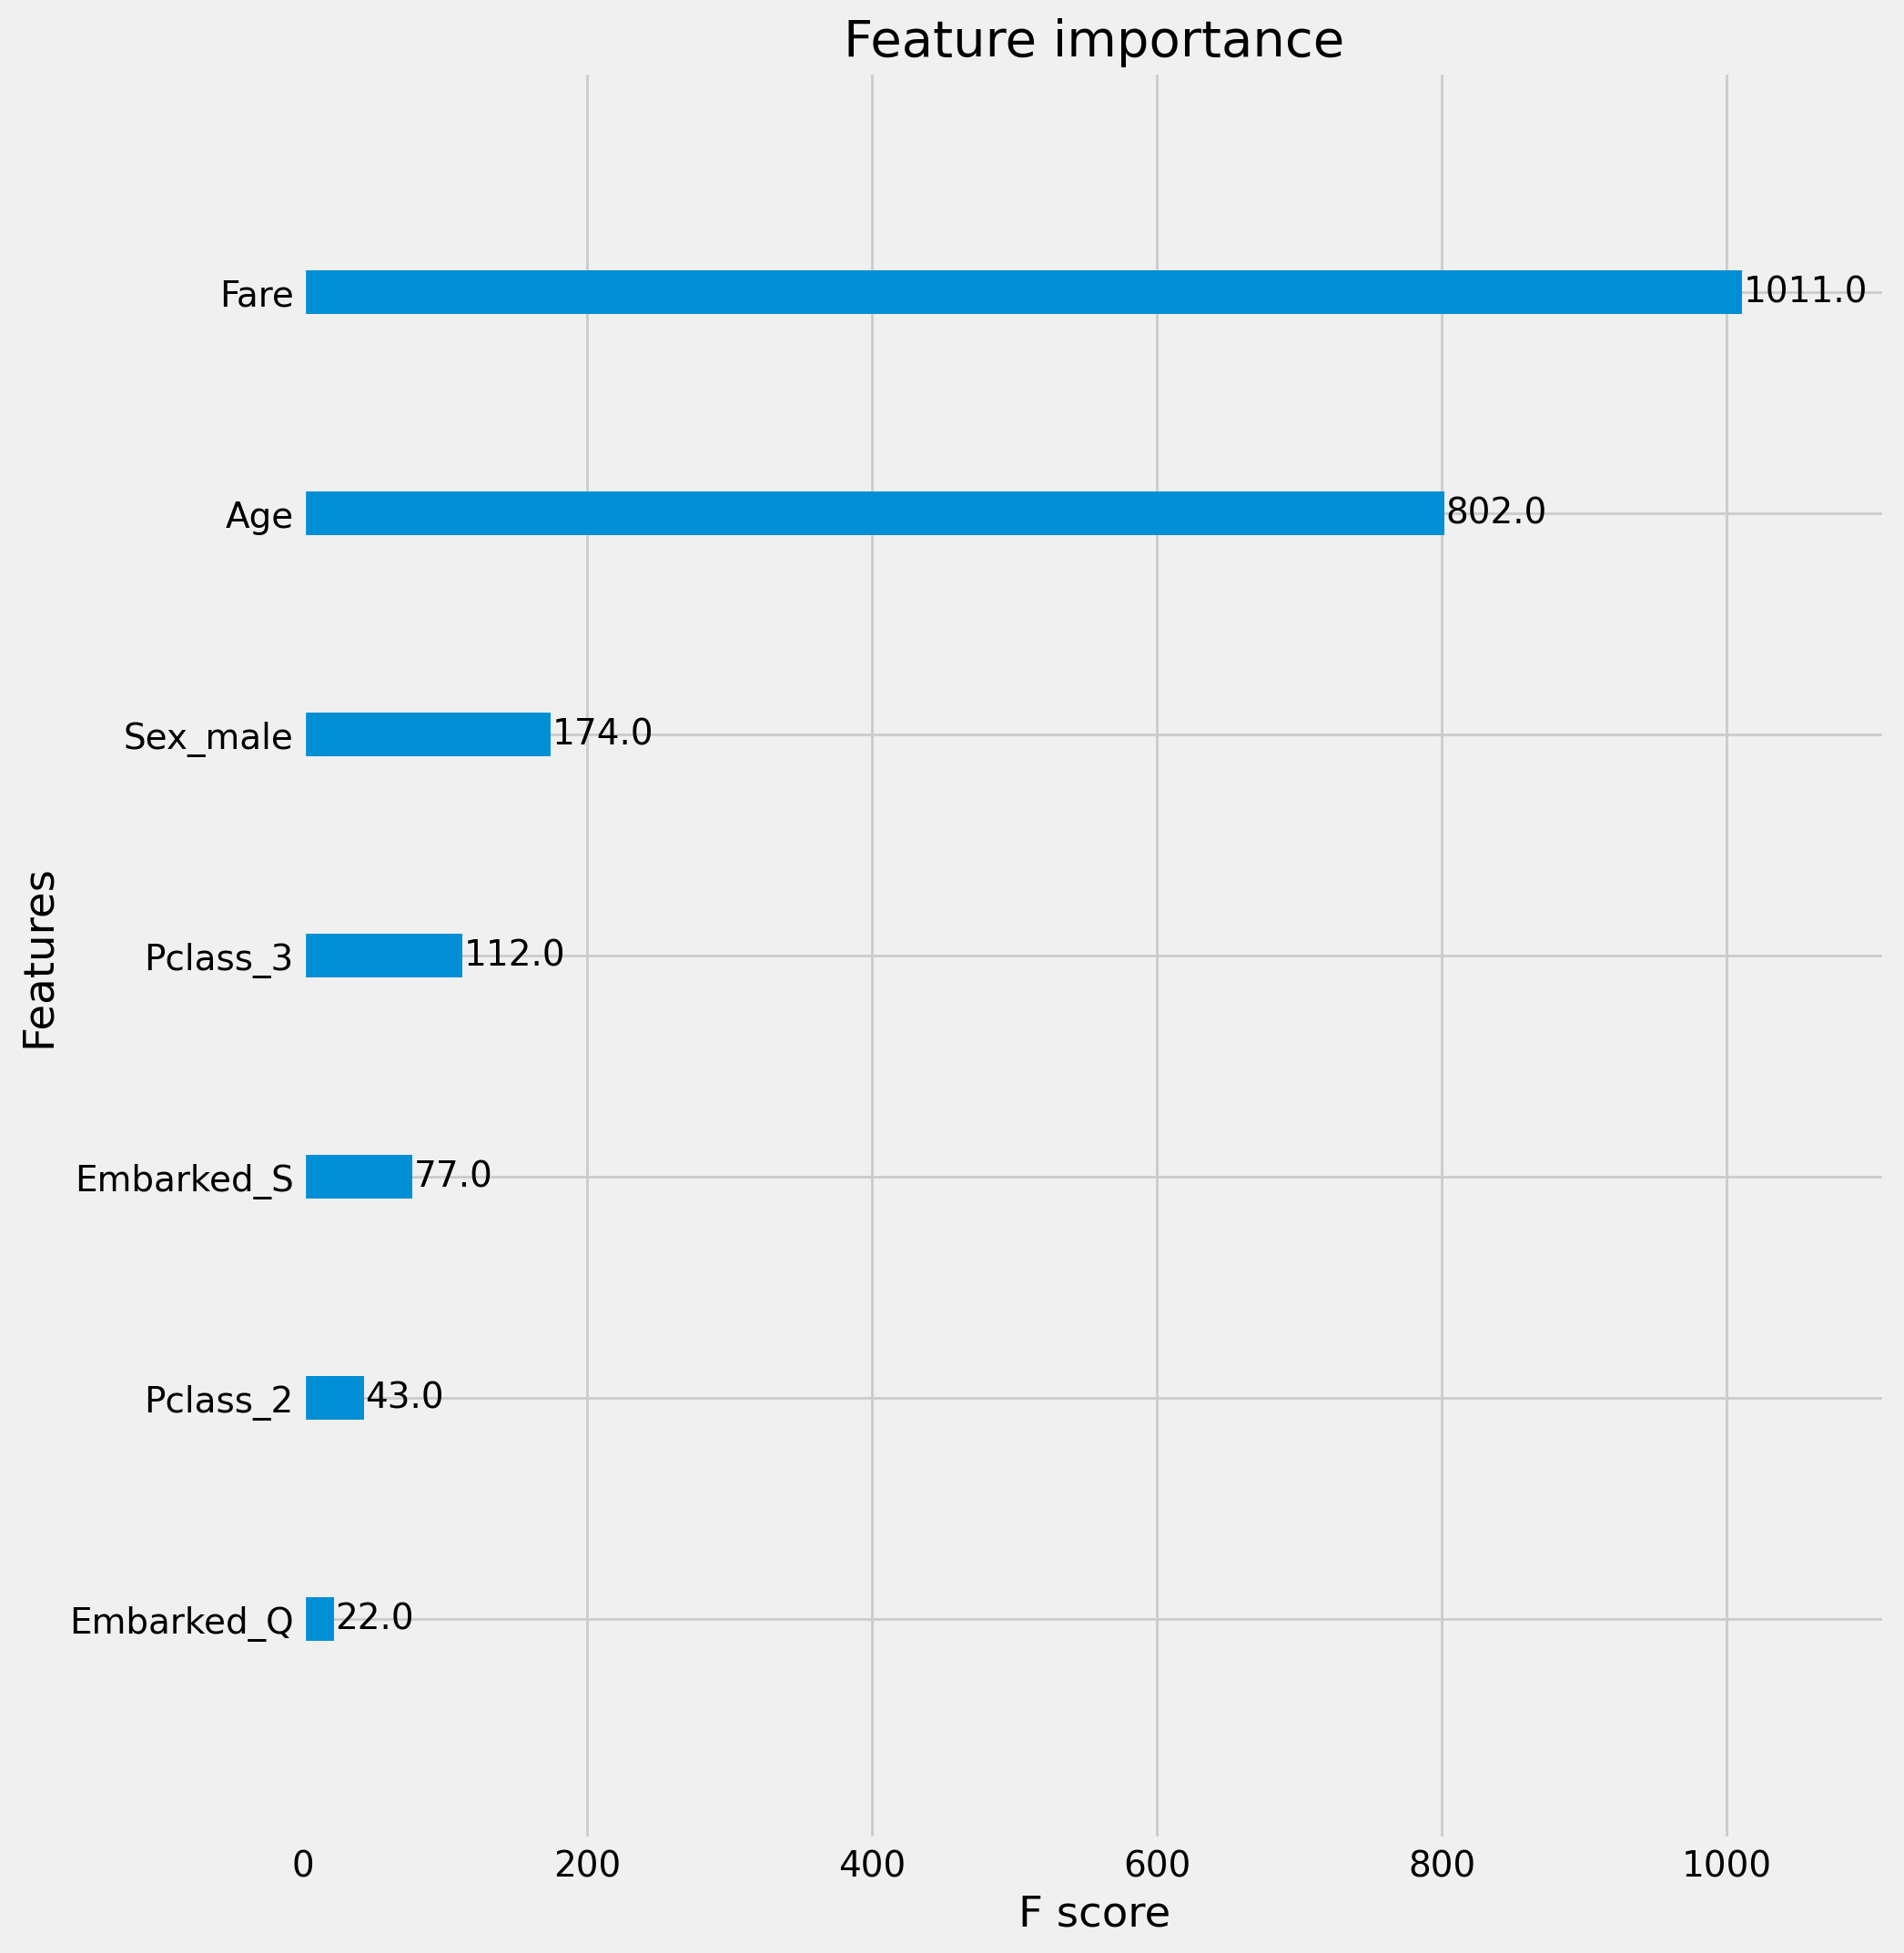

In [ ]:
# 피처 중요도 시각화
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
plt.savefig('p239_xgb_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

### LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_score

# LightGBM 모델 학습
dtrain = lgb.Dataset(X_train, label=y_train)
dtest = lgb.Dataset(X_test, label=y_test)

model = lgb.train(
    params={
        "objective": "binary",
        "metric": "auc",
    },
    train_set=dtrain,
    valid_sets=[dtest],
    num_boost_round=3000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
    ]
)

# 테스트 세트로 예측 수행
y_pred_proba = model.predict(X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_proba]  # 0.5를 기준으로 이진 분류

# 평가지표 계산 및 출력
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Precision: {precision:.4f}')
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)


[LightGBM] [Info] Number of positive: 199, number of negative: 339
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 538, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369888 -> initscore=-0.532695
[LightGBM] [Info] Start training from score -0.532695
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

### 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
# 랜덤 포레스트 모델 초기화
model = RandomForestClassifier(random_state=42, n_estimators=100)

# 모델 학습
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 테스트 세트로 예측 수행
y_pred = model.predict(X_test)

# 정확도(Accuracy) 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 분류 보고서(Classification Report) 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬(Confusion Matrix) 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 정밀도(Precision) 평가
precision = precision_score(y_test, y_pred, average='weighted')  # average='weighted'는 다중 클래스에서 각 클래스의 비율에 따라 가중 평균을 계산합니다.
print(f'\nPrecision: {precision:.4f}')

Accuracy: 0.7965

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       168
           1       0.62      0.67      0.64        63

    accuracy                           0.80       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.80      0.80      0.80       231


Confusion Matrix:
[[142  26]
 [ 21  42]]

Precision: 0.8020


또 다른 정확도 확인 방법이 뭐가 있을까요?

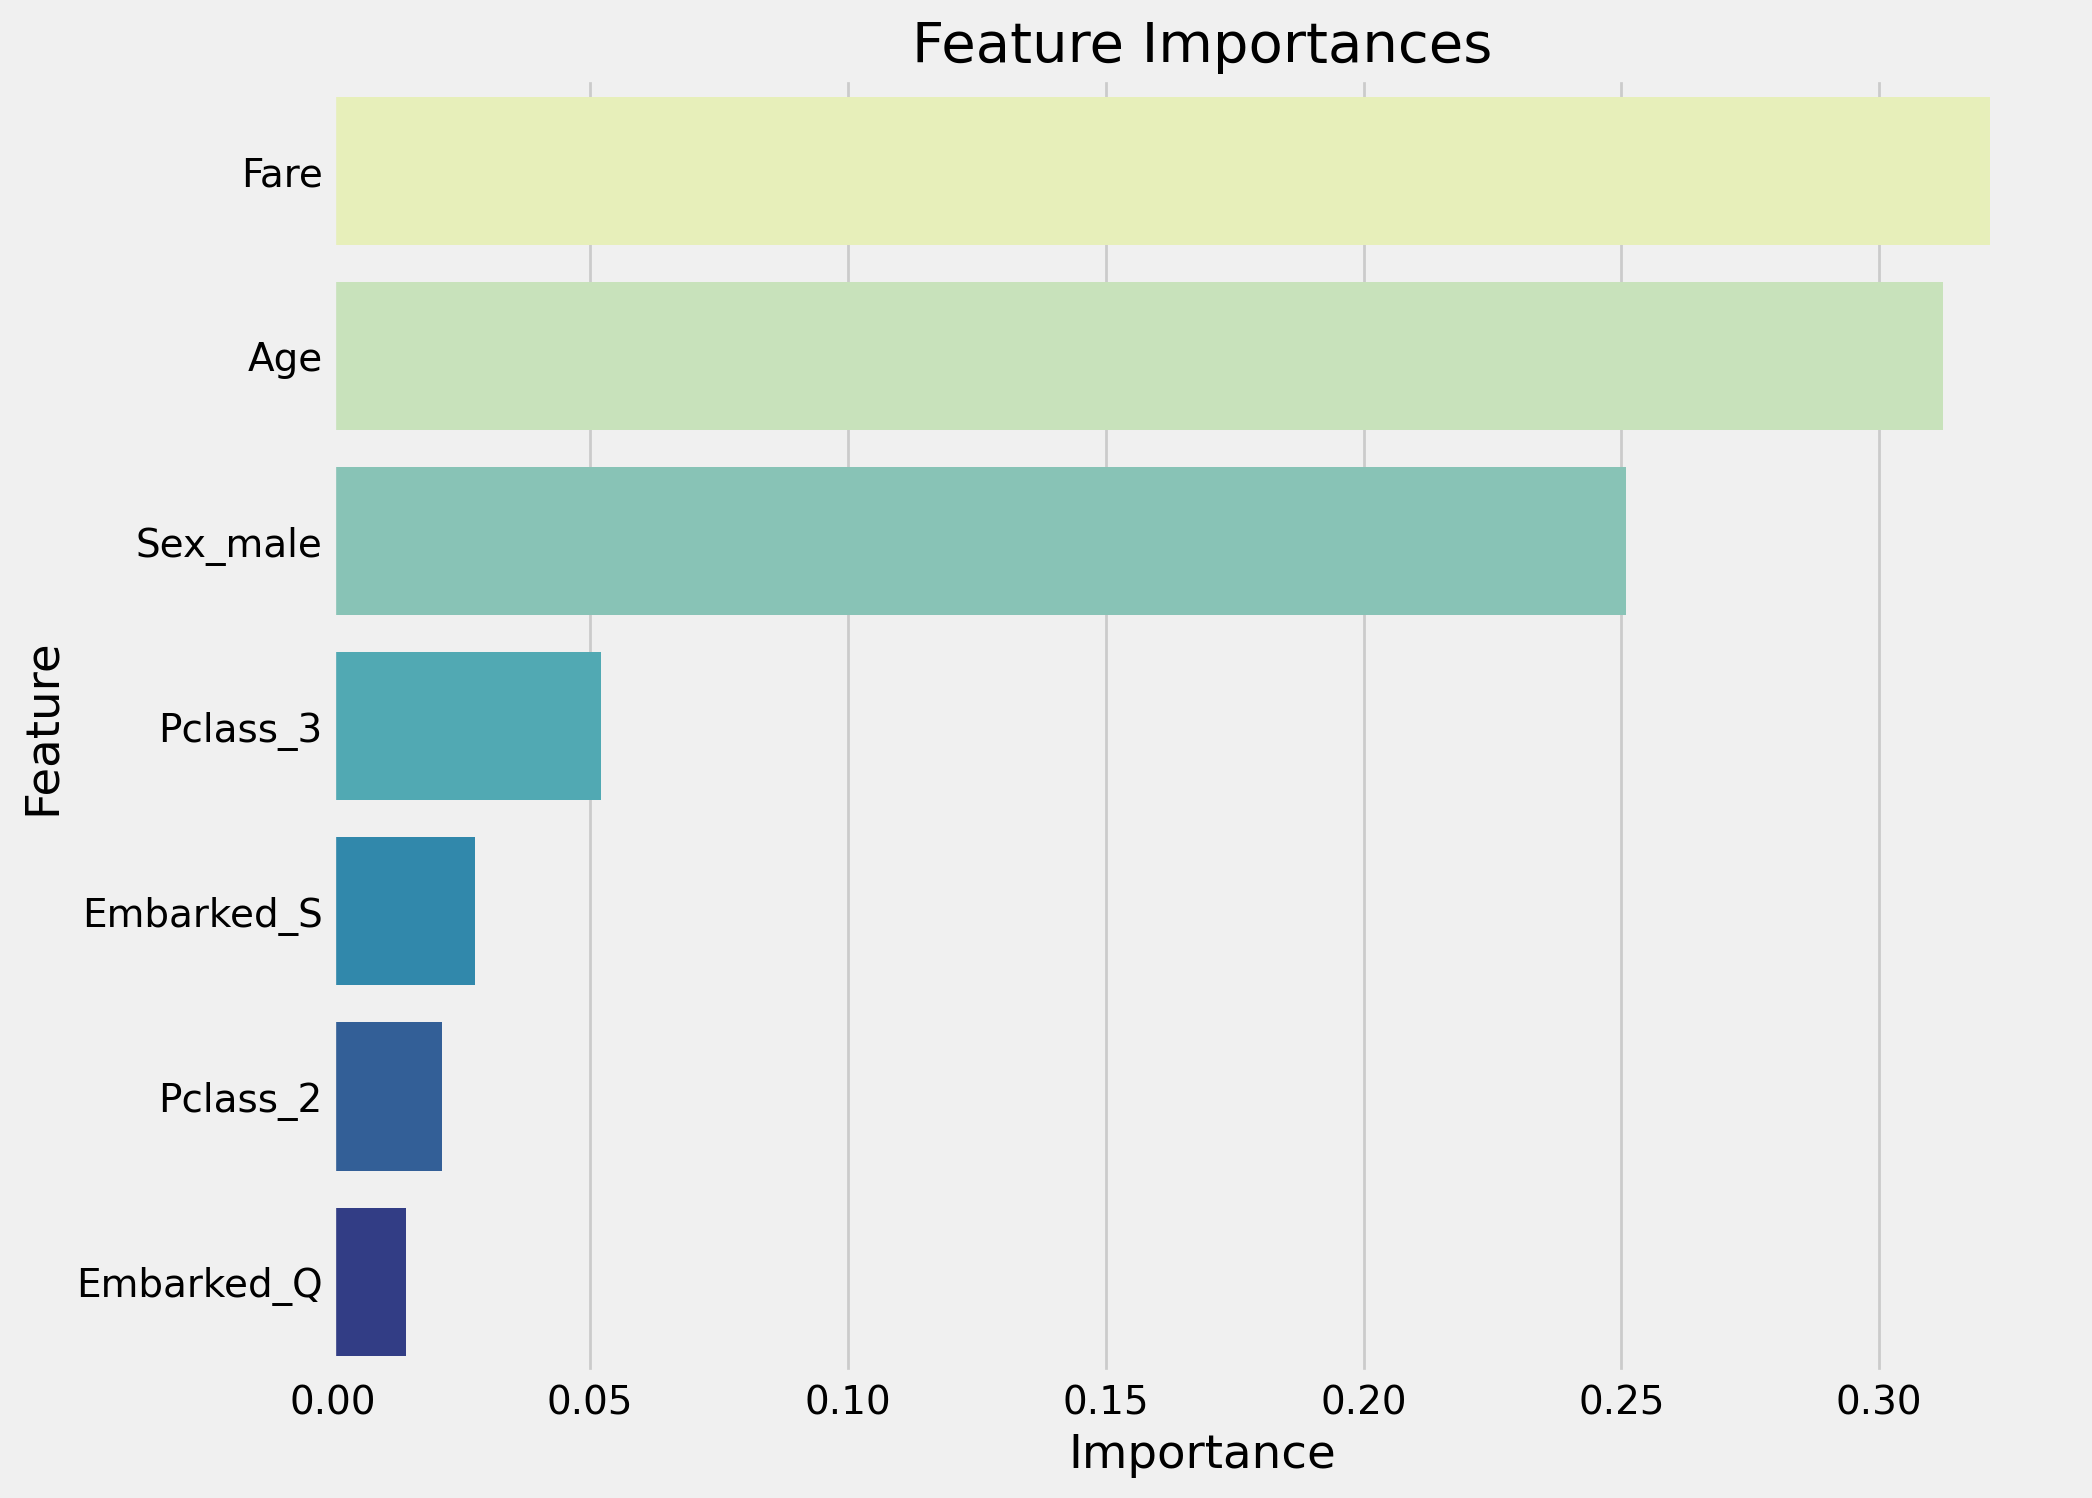

In [ ]:
# 특징 중요도 추출
feature_importances = model.feature_importances_
features = X_train.columns

# 중요도 시각화
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# 중요도 순서로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='YlGnBu')
plt.title('Feature Importances')
plt.show()

Feature Importance를 확인하여 영향이 없는 칼럼을 삭제하거나 합치는 등 작업을 수행할 수 있습니다.

# 예측

### test 파일 전처리

훈련 데이터에 대해 수행한 스케일링, 인코딩, 컬럼 선택 등 전처리 과정은 테스트 데이터에도 동일하게 적용되어야 합니다.

In [ ]:
#피쳐 선택
test = ori_test[['Age', 'Fare', 'Embarked', 'Sex', 'Pclass']]

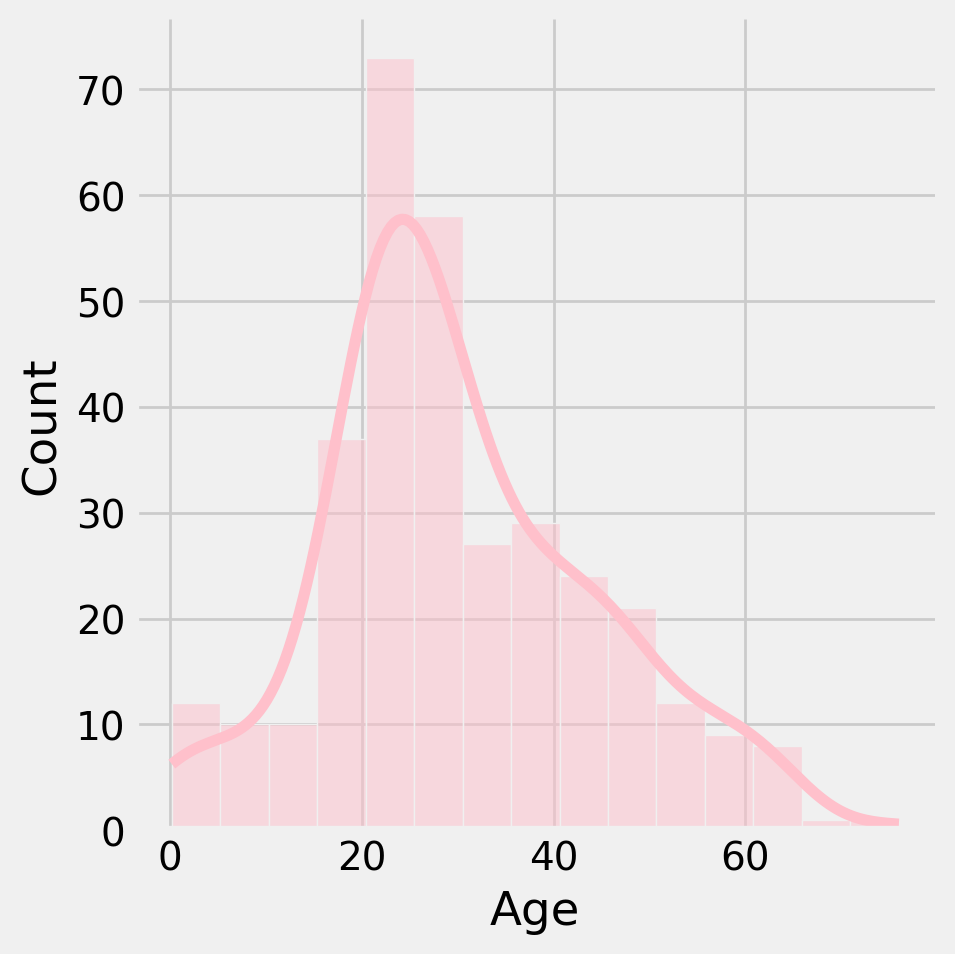

In [ ]:
#Mean or Median? 데이터 분포를 확인해 결정하기!
sns.displot(test['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

In [ ]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

In [ ]:
#fare 결측치 처리
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [ ]:
test.isnull().sum()

,0
Age,0
Fare,0
Embarked,0
Sex,0
Pclass,0


### 이상치 판단

### 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 스케일러 초기화
scaler = MinMaxScaler()

# 연속형 변수만 스케일링
test[['Age', 'Fare']] = scaler.fit_transform(test[['Age', 'Fare']])

In [ ]:
# Robust Scaler 써보기
# 근데 생각해보니까 이상치 다 제거해서 필요없을 거 같기도

In [ ]:
# 범주형 변수를 원-핫 인코딩
test = pd.get_dummies(test, columns=['Pclass', 'Embarked', 'Sex'], drop_first=True) #첫번째 범주를 드롭하여 다중공선성 문제 최소화
test
#scaled, encoding 완료되었습니다.

,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0.452723,0.015282,False,True,True,False,True
1,0.617566,0.013663,False,True,False,True,False
2,0.815377,0.018909,True,False,True,False,True
3,0.353818,0.016908,False,True,False,True,True
4,0.287881,0.023984,False,True,False,True,False
...,...,...,...,...,...,...,...
413,0.353818,0.015713,False,True,False,True,True
414,0.512066,0.212559,False,False,False,False,False
415,0.505473,0.014151,False,True,False,True,True
416,0.353818,0.015713,False,True,False,True,True


In [ ]:
test = test.reindex(columns=X_train.columns, fill_value=0)

# 2. 모델을 사용하여 예측
y_pred_test = model.predict(test)

# 3. 예측 결과를 test 데이터프레임에 추가
test['Survived'] = y_pred_test

# 예측된 survived 값을 확인
print(test[['Survived']])

     Survived
0           0
1           0
2           0
3           0
4           0
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]


### 앙상블 모델 (이게 가장 결과가 좋게 나와서 선정)





In [ ]:
test = test.reindex(columns=X_train.columns, fill_value=0)

# 2. 모델을 사용하여 예측
y_pred_test = vo_clf.predict(test)

# 3. 예측 결과를 test 데이터프레임에 추가
test['Survived'] = y_pred_test

# 예측된 survived 값을 확인
print(test[['Survived']])

     Survived
0           0
1           0
2           0
3           0
4           1
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]


In [ ]:
# 랜덤포레스트
test['Survived'].value_counts()

,count
Survived,
0,329
1,89


In [ ]:
# 앙상블
test['Survived'].value_counts()

,count
Survived,
0,297
1,121


# 모델 저장

In [ ]:
from datetime import datetime

feature_importances = model.feature_importances_
features = test.columns

feature_importance_list = list(zip(features, feature_importances))

args.results.append(
    {
        'model': 'forest11',
        'score_tr': '',
        'score_te': '',
        'auc_te': accuracy,
        'len_features': test.shape[1],
        'feature_importances': feature_importance_list,  # 리스트 형태로 저장
        'create_dt': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    }
)

args.results

[{'model': 'forest11',
  'score_tr': '',
  'score_te': '',
  'auc_te': 0.7965367965367965,
  'len_features': 8,
  'feature_importances': [('Age', 0.3123964205354884),
   ('Fare', 0.3214425444483117),
   ('Pclass_2', 0.02121212251841271),
   ('Pclass_3', 0.052125803882712714),
   ('Embarked_Q', 0.014178579237442297),
   ('Embarked_S', 0.027730106595362014),
   ('Sex_male', 0.25091442278227016)],
  'create_dt': '2024-09-08 16:03:35'}]

In [ ]:
# 결과 출력
for result in args.results:
    print(f"Model: {result['model']}, AUC: {result['auc_te']}, Date: {result['create_dt']}")

# 특정 모델의 성능 분석
model_results = [r for r in args.results if r['model'] == 'forest11']

Model: forest11, AUC: 0.7965367965367965, Date: 2024-09-08 16:03:35


In [ ]:
model_result_df = pd.DataFrame(model_results)

In [ ]:
# AUC 값을 기준으로 내림차순 정렬
sorted_results = model_result_df.sort_values(by='auc_te', ascending=False)

In [ ]:
# 가장 높은 AUC를 가진 모델의 예측값 선택
best_model = sorted_results.iloc[0]
best_model_predictions = best_model['feature_importances']

In [ ]:
# PassengerId와 Survived를 함께 결합합니다
submission = pd.concat([ori_test[['PassengerId']], test[['Survived']]], axis=1)

In [ ]:
submission.isnull().sum()

,0
PassengerId,0
Survived,0


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
submission.to_csv('/content/drive/MyDrive/titanic/submission.csv', index=False)

In [ ]:
import os
#휘발성이므로 런타임 해제될 시 확인 불가. 따라서 json/csv로 저장하는 것이 권장

today_results = pd.DataFrame(args.results)

file_path = 'model_results.csv'

if os.path.exists(file_path):
    existing_results = pd.read_csv(file_path)
    combined_results = pd.concat([existing_results, today_results], ignore_index=True)
else:
    combined_results = today_results

combined_results.to_csv(file_path, index=False)

print(f"Results have been saved to {file_path}")

Results have been saved to model_results.csv


# Submission

In [ ]:
submission['Survived'].value_counts()

,count
Survived,
0,329
1,89


In [ ]:
ori_train['Survived'].value_counts()

,count
Survived,
0,549
1,342
